## $^{222}\text{Rn}$-$\alpha$ in $\text{Xe}$

How is the detector stability in terms of?

- Lifetime.
- Energy map.
- Light yield.

In [3]:
import sys
sys.path.append('/lustre/ific.uv.es/prj/gl/neutrinos/users/ccortesp/libs')

import crudo
import fit_functions as ff
from   iminuit import Minuit
from   iminuit.cost import LeastSquares
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import plotting_tools as pt
import tables as tb
from   scipy.optimize import curve_fit

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Runs Information

In [4]:
# Select the type of scan in your comparison. If it is needed.
# scan, scan_key = "EL", "EL_HV"
# scan, scan_key = "Cathode", "cath_HV"

# Define the runs to be analyzed
runs_info = [
                # # Drift field scan: Oct 2024
                # {"run_number": 14440, "cath_HV": 18e3, "EL_HV": 6e3, "duration": 42952},
                # {"run_number": 14456, "cath_HV": 19e3, "EL_HV": 6e3, "duration": 56420},
                # {"run_number": 14468, "cath_HV": 20e3, "EL_HV": 6e3, "duration": 55696},
                # {"run_number": 14484, "cath_HV": 21e3, "EL_HV": 6e3, "duration": 48240},
                # {"run_number": 14489, "cath_HV": 22e3, "EL_HV": 6e3, "duration": 42314},
                # {"run_number": 14498, "cath_HV": 23e3, "EL_HV": 6e3, "duration": 43161},
                # {"run_number": 14519, "cath_HV": 23e3, "EL_HV": 6e3, "duration": 43274},
                # {"run_number": 14522, "cath_HV": 23e3, "EL_HV": 6e3, "duration": 42801},
                # # Gas recirculation: Nov 2024
                # {"run_number": 14581, "cath_HV": 23e3, "EL_HV": 6e3, "duration": 76086},
                # {"run_number": 14582, "cath_HV": 23e3, "EL_HV": 6e3, "duration": 79541},
                # {"run_number": 14588, "cath_HV": 23e3, "EL_HV": 6e3, "duration": 55856},
                # # EL voltage scan: Dic 2024
                # {"run_number": 14601, "cath_HV": 23e3, "EL_HV": 7e3, "duration": 77537},
                # {"run_number": 14608, "cath_HV": 23e3, "EL_HV": 8e3, "duration": 86414},
                # {"run_number": 14704, "cath_HV": 23e3, "EL_HV": 9e3, "duration": 52765},
                # # EL voltage scan: Jan 2025
                # {"run_number": 14714, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 64527},
                # {"run_number": 14720, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 48518},
                # {"run_number": 14733, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 53881},
                # {"run_number": 14735, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 84987},
                # {"run_number": 14737, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 72705},
                # {"run_number": 14739, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 87138},
                # {"run_number": 14741, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 87755},
                # {"run_number": 14743, "cath_HV": 23e3, "EL_HV": 7.5e3, "duration": 82332},
    
                # # # # #  A L P H A   R U N S # # # # #
    
                # Jan 2025
                # {"run_number": 14714, "duration": 64527, "OK": -1     , "LOST": -1     , "real_rate": -1    },
                # {"run_number": 14715, "duration": 84365, "OK": 2469062, "LOST": 2239303, "real_rate": 55.809},  # NO processed
                # {"run_number": 14716, "duration": 17036, "OK": 495769 , "LOST": 451306 , "real_rate": 55.592},
                # {"run_number": 14720, "duration": 48518, "OK": -1     , "LOST": -1     , "real_rate": -1    },
                # {"run_number": 14733, "duration": 53881, "OK": 1587637, "LOST": 1429629, "real_rate": 55.998},
                # {"run_number": 14735, "duration": 84987, "OK": 2508569, "LOST": 2267982, "real_rate": 56.203},
                # {"run_number": 14737, "duration": 72705, "OK": 2153786, "LOST": 1960347, "real_rate": 56.586},
                {"run_number": 14739, "duration": 87138, "OK": 2576630, "LOST": 2334343, "real_rate": 56.358},
                # {"run_number": 14741, "duration": 87755, "OK": 2592615, "LOST": 2349583, "real_rate": 56.318},
                # {"run_number": 14743, "duration": 82332, "OK": 2437984, "LOST": 2220643, "real_rate": 56.583},
                # {"run_number": 14745, "duration": 60990, "OK": 1803415, "LOST": 1636317, "real_rate": 56.398},
                # --- NO Cold Getter: Jan 27 --- #
                # {"run_number": 14753, "duration": 86308, "OK": 2188547, "LOST": 1532351, "real_rate": 43.111},
                # {"run_number": 14765, "duration": 55978, "OK": 1259832, "LOST": 735202 , "real_rate": 35.639},
                # {"run_number": 14776, "duration": 47397, "OK": 957081 , "LOST": 481810 , "real_rate": 30.358},  # Data removed
                # {"run_number": 14780, "duration": 88503, "OK": 1600797, "LOST": 682246 , "real_rate": 25.796},  # NO processed
                # Feb 2025
                # {"run_number": 14782, "duration": 85654, "OK": 1382153, "LOST": 506234 , "real_rate": 22.046},
                # {"run_number": 14784, "duration": 57290, "OK": 842541 , "LOST": 273581 , "real_rate": 19.481},
                # {"run_number": 14789, "duration": 74148, "OK": 976360 , "LOST": 277504 , "real_rate": 16.910},
                # --- Zero Suppression --- #
                # {"run_number": 14803, "duration": 71721, "OK": 933727 , "LOST": 104677 , "real_rate": 14.478},
                # {"run_number": 14804, "duration": 65116, "OK": 680552 , "LOST": 156995 , "real_rate": 12.862},
                # --- NO ZS --- #
                # {"run_number": 14811, "duration": -1   , "OK": -1     , "LOST": -1     , "real_rate": -1    },  # Weird data
                # {"run_number": 14814, "duration": 6344 , "OK": 55679  , "LOST": 10155  , "real_rate": 10.377},
                # {"run_number": 14815, "duration": 86232, "OK": 717786 , "LOST": 121527 , "real_rate": 9.733 },
                # {"run_number": 14816, "duration": 86580, "OK": 659265 , "LOST": 101374 , "real_rate": 8.785 },
                # {"run_number": 14817, "duration": 49662, "OK": 352203 , "LOST": 50474  , "real_rate": 8.108 },
                # {"run_number": 14828, "duration": 53609, "OK": 300827 , "LOST": 100405 , "real_rate": 7.484 },
                # {"run_number": 14829, "duration": 73042, "OK": 387003 , "LOST": 121249 , "real_rate": 6.958 },  # Low stats
                # {"run_number": 14834, "duration": 5779 , "OK": 32864  , "LOST": 3887   , "real_rate": 6.359 },  # Low stats
                # {"run_number": 14835, "duration": 11713, "OK": 66515  , "LOST": 7358   , "real_rate": 6.306 },  # Low stats
                # {"run_number": 14837, "duration": 55751, "OK": 294175 , "LOST": 31034  , "real_rate": 5.833 },
                # {"run_number": 14838, "duration": 87854, "OK": 431766 , "LOST": 42219  , "real_rate": 5.395 },
                # {"run_number": 14839, "duration": 84881, "OK": 401004 , "LOST": 37747  , "real_rate": 5.169 },
                # {"run_number": 14840, "duration": 55363, "OK": -1     , "LOST": -1     , "real_rate": -1    },  # Low stats
            ]

### Selected Data

In [5]:
# Dataframe name
df_name = 'alpha_runs'

In [7]:
# Open the file with selected data
with open(f"/lustre/ific.uv.es/prj/gl/neutrinos/users/ccortesp/NEXT-100/data/{df_name}.pkl", "rb") as file:
    data = pickle.load(file)
    
# print(f"Ahí tiene su data, mi rey... \nRuns: {data.keys()}")

# This is the number of events you work with
print('Available statistic...')
for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    
    print(f'Run {run_id}: {data[run_id].shape[0]} events')

Available statistic...
Run 14739: 72721 events


#### Active volume and cathode surroundings masks!

In [8]:
# Time mask
DT_stop = {run["run_number"]: crudo.cathode_position(run, data, step_back=1)[run["run_number"]] for run in runs_info}
# Active volume
AV_mask = {run["run_number"]: (
                                (data[run["run_number"]]['DT'] >= 0) 
                              & (data[run["run_number"]]['DT'] < DT_stop[run["run_number"]])
                              ) 
           for run in runs_info}
# Cathode surroundings
cath_mask = {run["run_number"]: data[run["run_number"]]['DT'] >= DT_stop[run["run_number"]] for run in runs_info}      

Run 14739: DT_stop = 1319.83 μs


## Fits
To fit data we just use the population of the detector's center, where the information is quite uniform.

In [9]:
# Store the lifetime fit information
fit_parameters = {run["run_number"]: {} for run in runs_info}

### $S1e$ Distribution

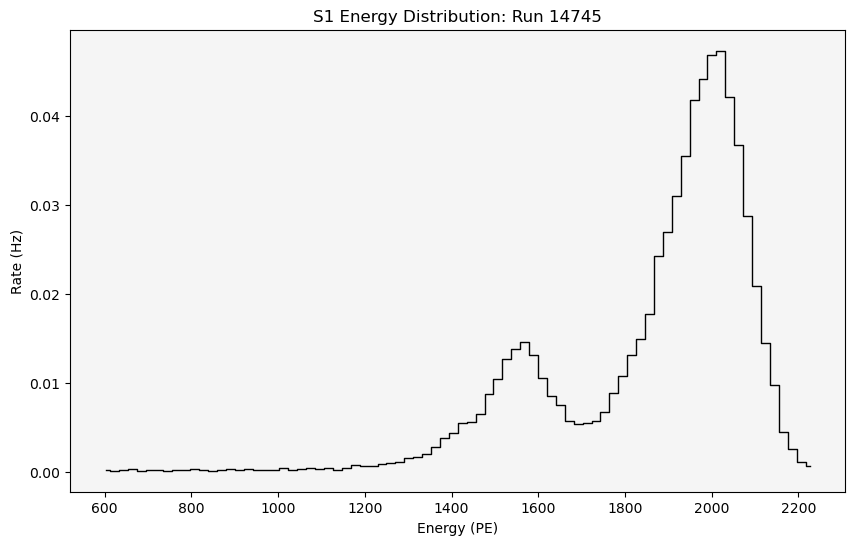

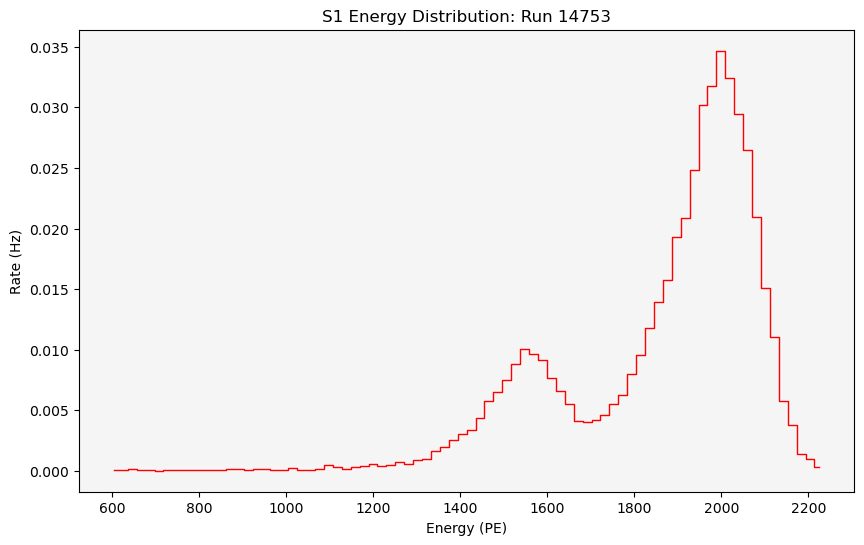

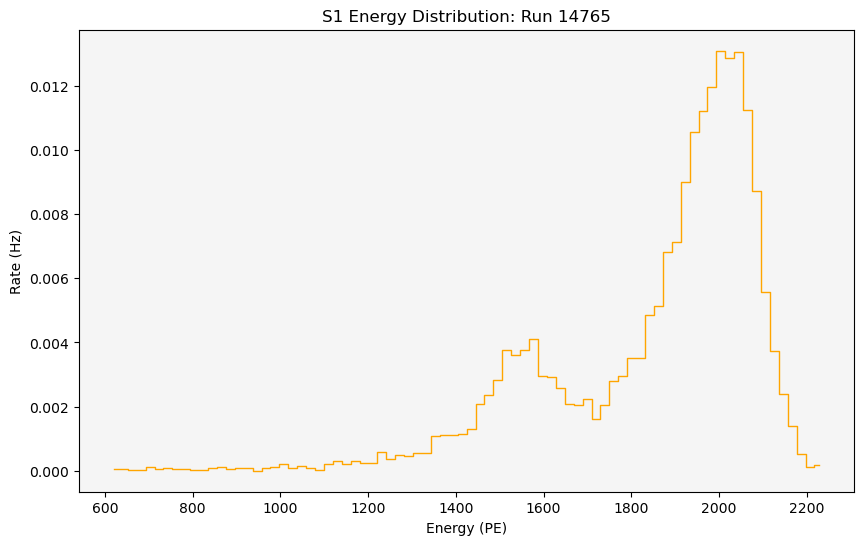

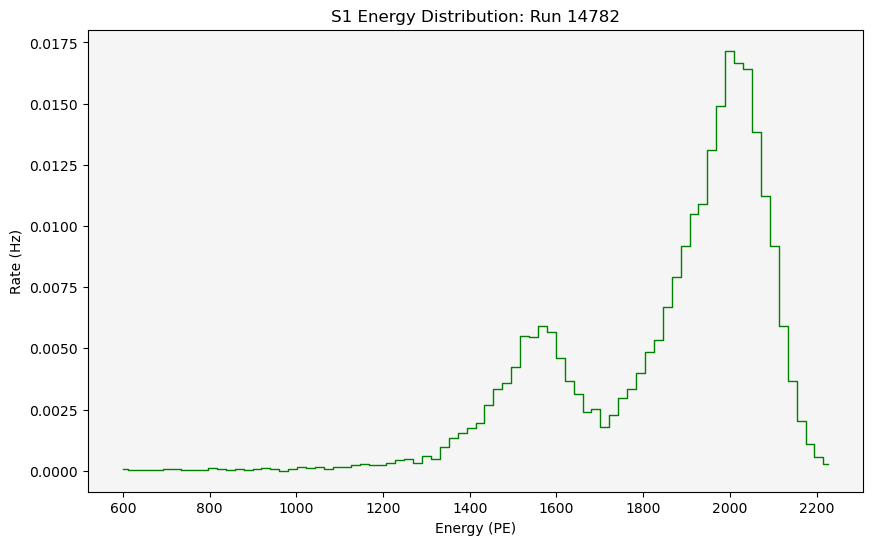

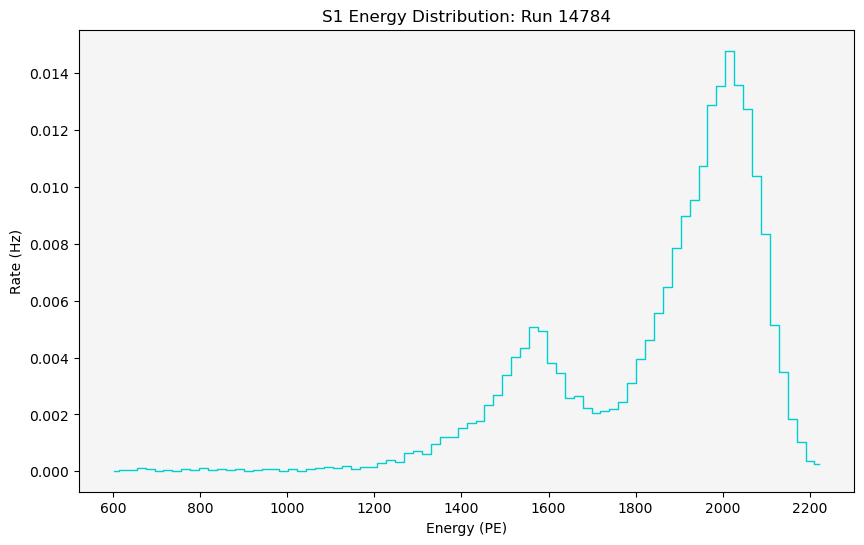

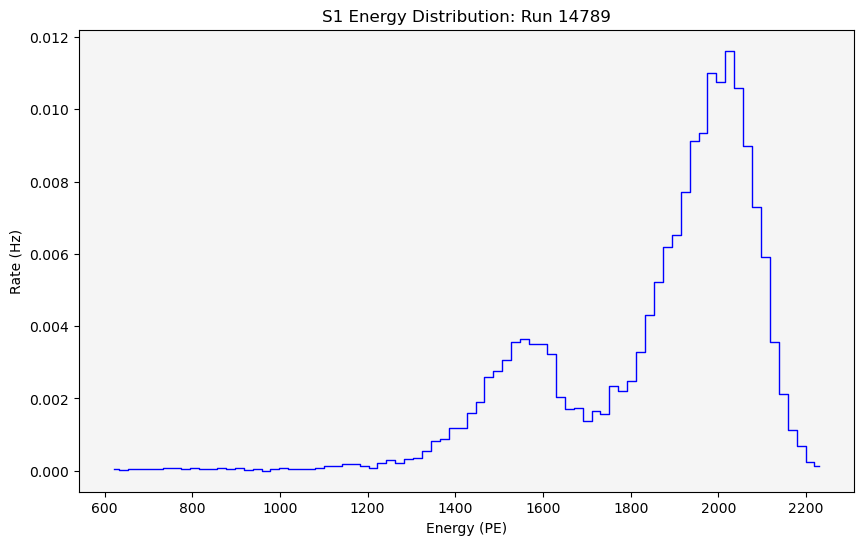

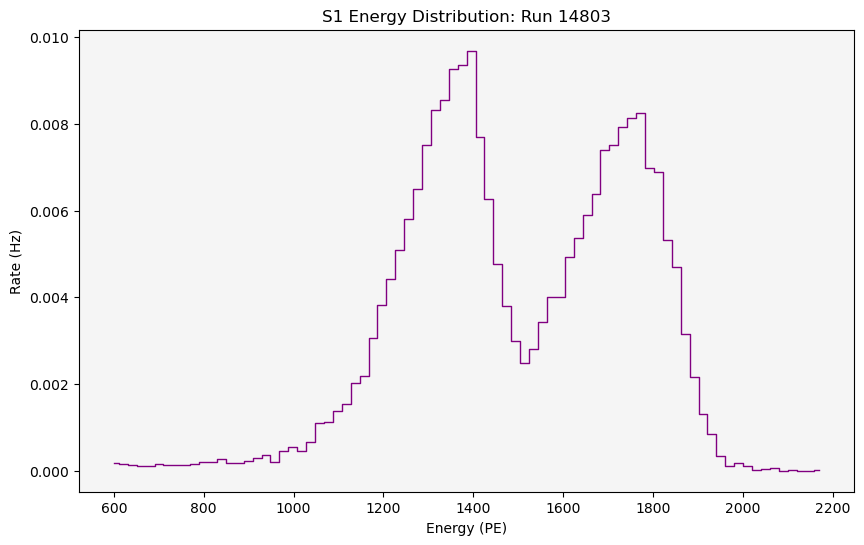

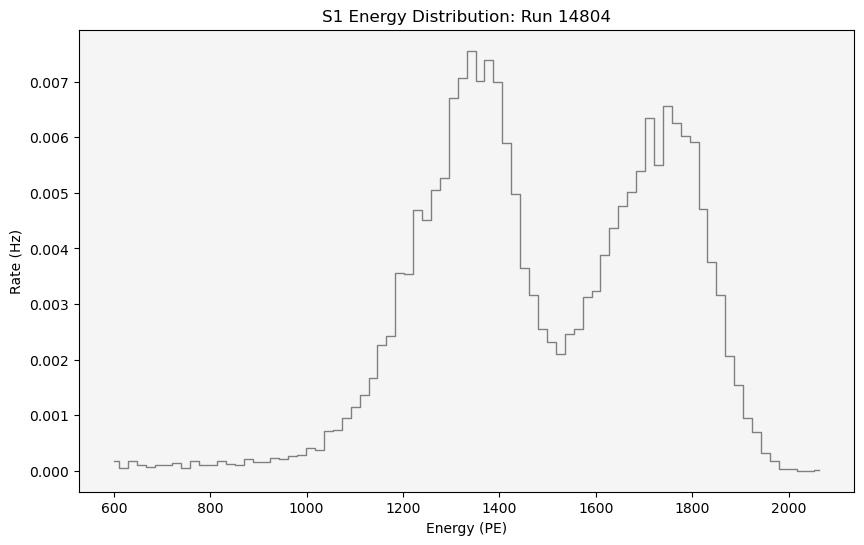

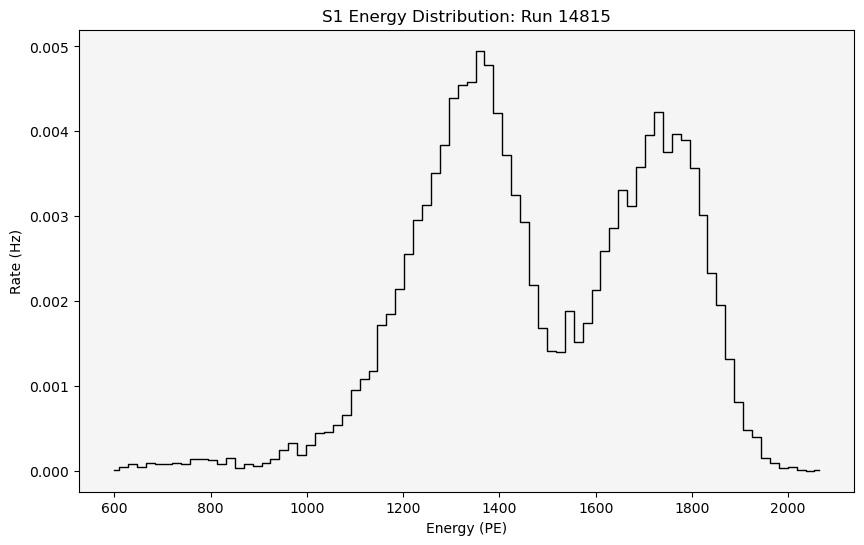

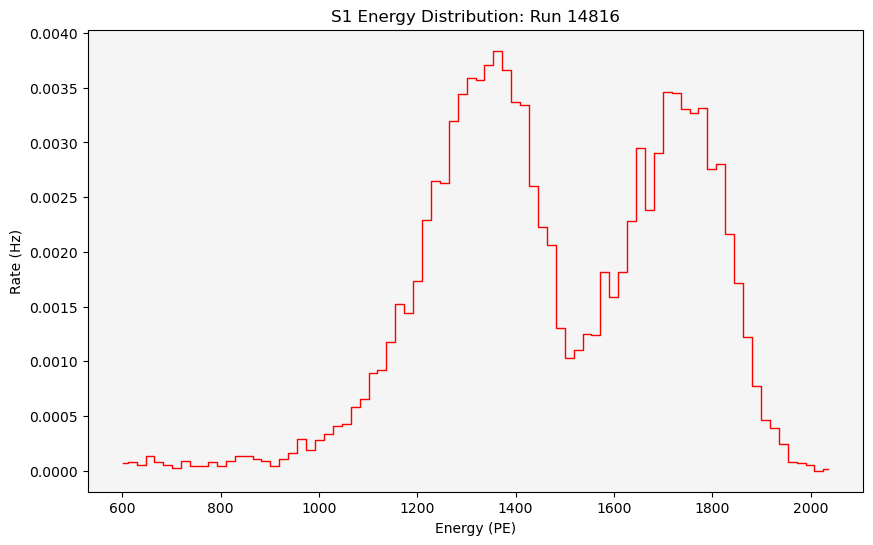

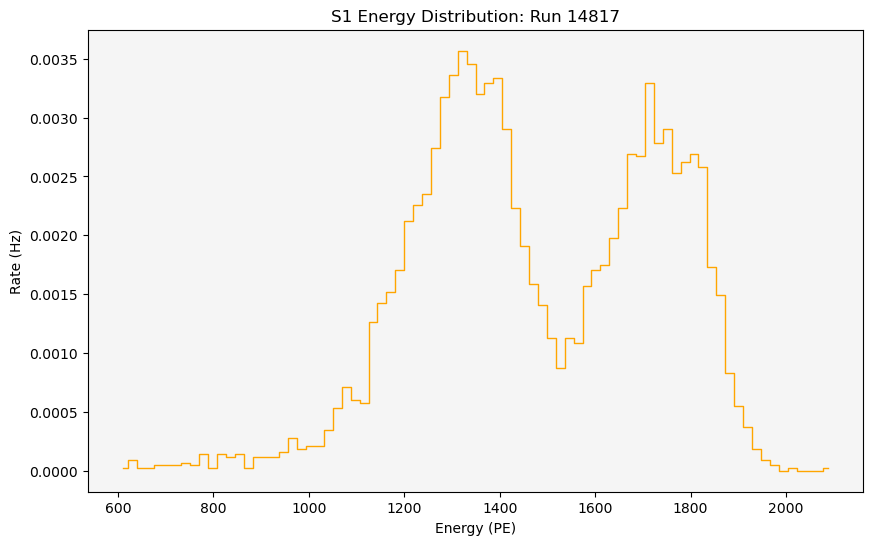

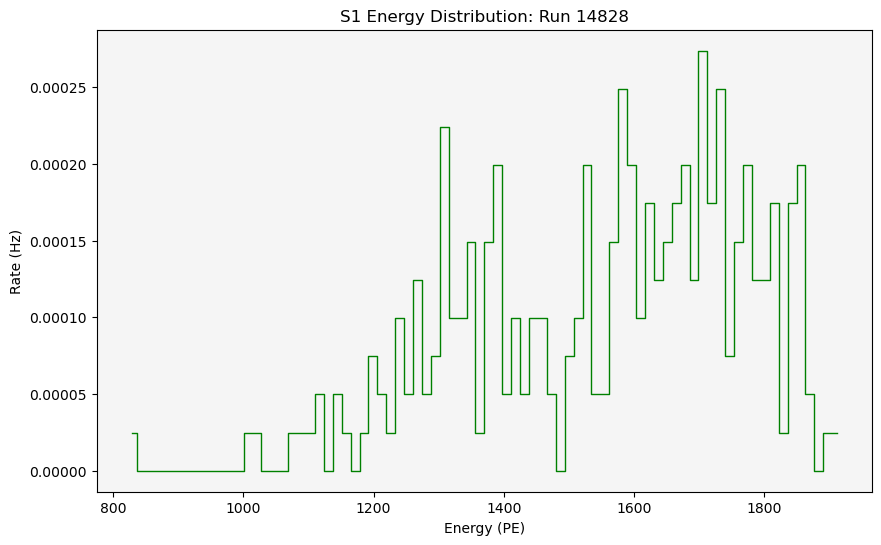

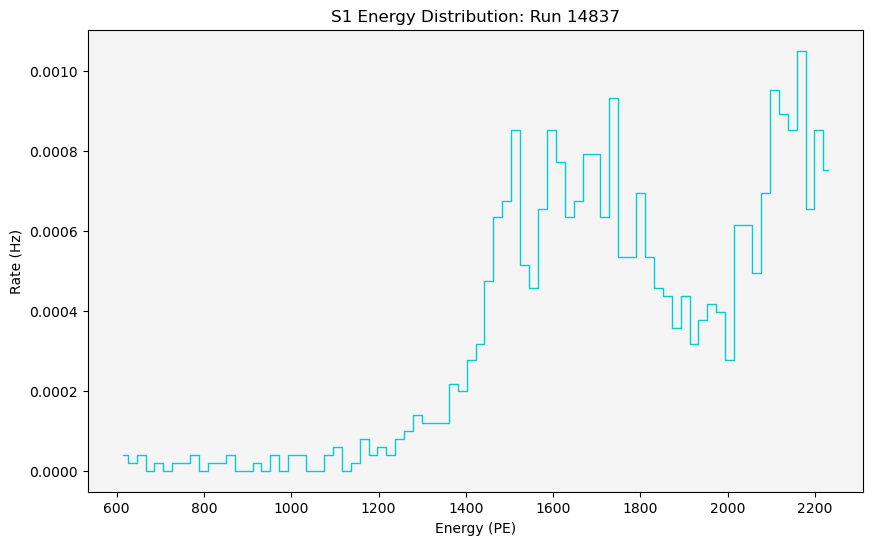

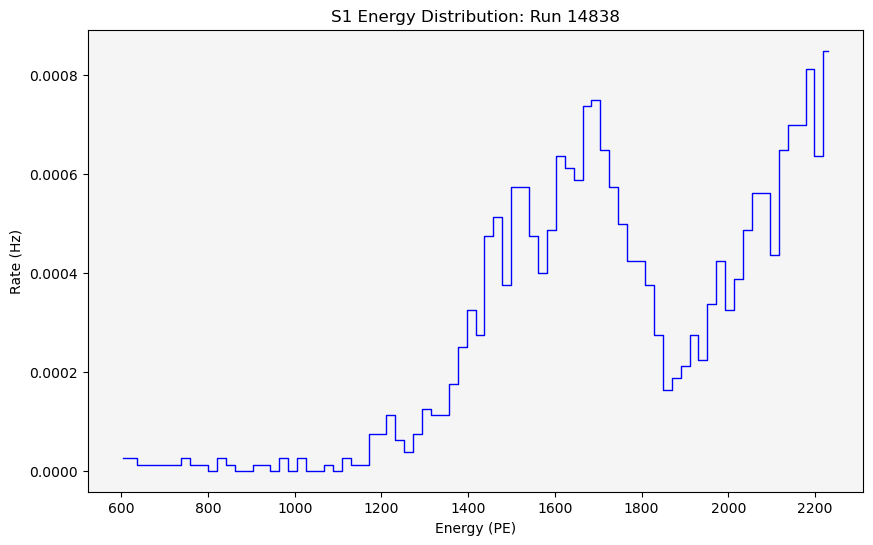

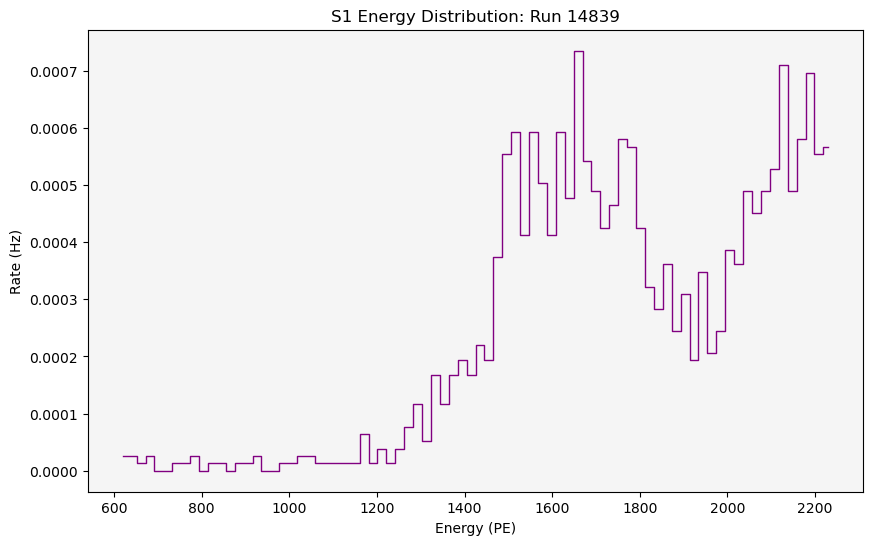

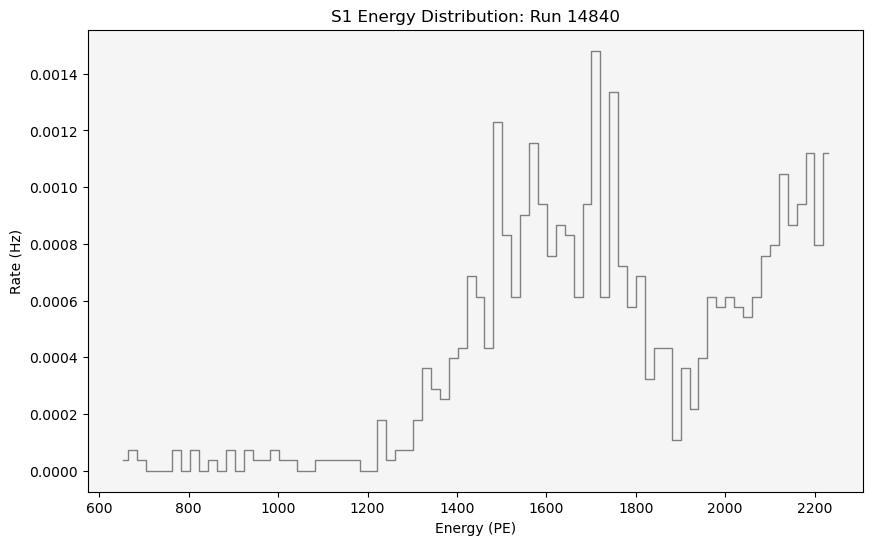

In [29]:
# Global
n_bins = 80

for i, entry in enumerate(runs_info):
    
    # Run info    
    run_id   = entry["run_number"]
    run_long = entry["duration"]
    run_DAQe = (entry["OK"] / (entry["OK"] + entry["LOST"]))
    
    # Variables
    E1 = data[run_id]['S1e']
    
    # Masking
    E1_mask = E1[cath_mask[run_id]]
    
    # Histogram: normalized by effective DAQ time
    E1_counts, E1_bins = np.histogram(E1_mask, bins=n_bins)
    E1_counts = E1_counts / (run_long  * run_DAQe)
    bin_width = np.diff(E1_bins).mean()
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.step(E1_bins[:-1], E1_counts, where='mid', 
             color=pt.hist_colors[i % len(pt.hist_colors)], lw=1.0)
    
#     # NO Scan!
#     E1_min = 1700
#     p0 = [0.5, 2000, bin_width]
#     if run_id in {14803, 14804, 14814, 14815, 14816, 14817, 14828, 14835, 14837}:
#         E1_min = 1500
#         p0 = [0.5, 1800, bin_width]
#     print(f'Run {run_id} - Initial values: {p0}')
    
#     # Fit
#     E1_centers, E1_fit = ff.prefit_1D(E1_bins, E1, E1_counts, x_min=E1_min, x_max=E1.max())
    
#     popt, pcov = curve_fit(ff.gauss_func, E1_centers, E1_fit, p0=p0)
#     perr = np.sqrt(np.diag(pcov))
#     print(f'Run {run_id} - Final values: {popt}') 
#     fit_parameters[run_id]["S1e"] = {"CV_A0": popt[0], "Error_A0": perr[0]}
#     # m_DT[run_id] = {'CV': popt[0], 'Error': np.sqrt(pcov[0, 0])}
    
#     # Plot the fitted line
#     fit_x = np.linspace(E1_centers.min(), E1_centers.max(), 100)
#     fit_y = ff.gauss_func(fit_x, *popt)
#     plt.plot(fit_x, fit_y, c='black', ls='--', lw=1)
    
    # Styling
    plt.xlabel('Energy (PE)')
    plt.ylabel('Rate (Hz)')
    #plt.yscale('log')
    plt.title(f'S1 Energy Distribution: Run {run_id}')

    plt.gca().set_facecolor("whitesmoke")
    #plt.grid(True)
    #plt.savefig(f'images/stability/something.png', bbox_inches='tight')
    plt.show()

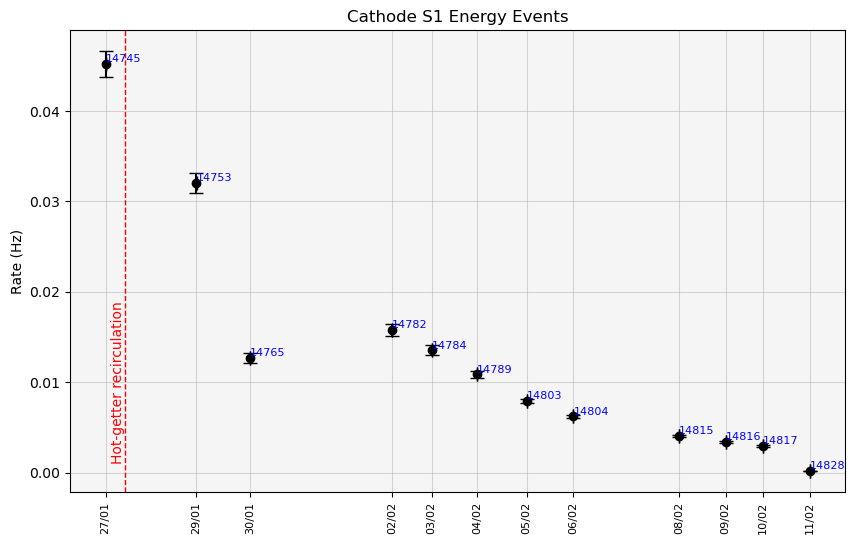

In [41]:
# Global
run_date = []

plt.figure(figsize=(10, 6))

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables    
    Date = data[run_id]['time']
    
    # Retrieve lifetime fit value   
    A0_CV    = fit_parameters[run_id]['S1e']['CV_A0']
    A0_error = fit_parameters[run_id]['S1e']['Error_A0']
    
    # Mean date + error for each run
    Date_CV    = Date.mean()
    Date_error = Date.std() / np.sqrt(len(Date))
    run_date.append(Date_CV)

    # Plot: run voltage or run date?
    # plt.errorbar(run_volt, LT_CV, yerr=LT_error,
    #              fmt='o', c='black', ecolor='black', capsize=5)
    plt.errorbar(Date_CV, A0_CV, xerr=Date_error, yerr=A0_error,
                 fmt='o', c='black', ecolor='black', capsize=5)
    plt.text(Date_CV, A0_CV, str(run_id), fontsize=8, ha='left', va='bottom', color='blue')   # Run number near the point

# Convert x-axis bin edges to readable time format. Flatten all_run_x for custom tick setting
x_labels = [crudo.epoch_converter(t, h=False) for t in run_date]

# Styling
# plt.xlabel('EL Voltage (kV)')
plt.xticks(run_date, x_labels, rotation=90, ha='center', fontsize=8)
plt.ylabel('Rate (Hz)')
# plt.ylim(0, 100)
plt.title(f'Cathode S1 Energy Events')
plt.axvline(x=1737975600, c='red', ls='--', lw=1)
plt.text(1737975600, 0.01, 'Hot-getter recirculation', c='red', va='center',  ha='right',  rotation=90)

plt.gca().set_facecolor("whitesmoke")
plt.grid(True, linestyle='-', linewidth=0.75, alpha=0.5)
plt.savefig(f'images/stability/cath_evolution.png', bbox_inches='tight')
plt.show()

### $S1e$ vs $DT$

Run 14739 fit: m = 0.5927 ± 0.0034 PE/μs, b = 780.77 ± 2.79 PE
χ² / ndof = 1.4722



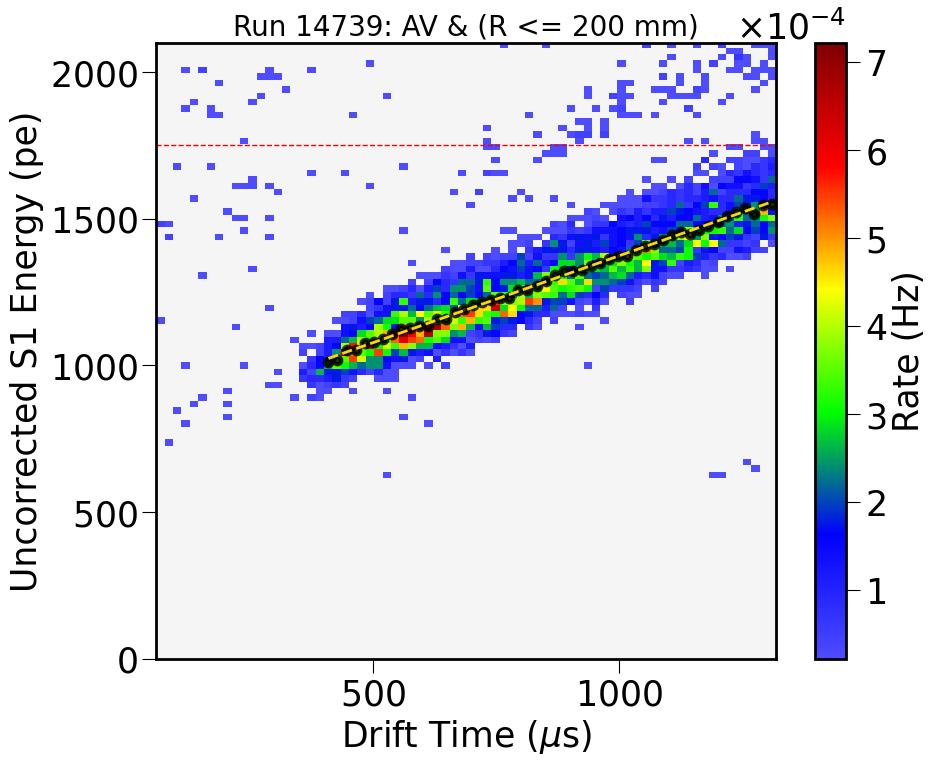

In [20]:
# Global
rad_lim = 200
n_bins  = 75

pt.auto_plot_style()


for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    run_long = entry["duration"]
    run_DAQe = (entry["OK"] / (entry["OK"] + entry["LOST"]))
        
    # Variables    
    E1 = data[run_id]['S1e']
    DT = data[run_id]['DT']
    R  = data[run_id]['R']

    # Masking
    rad_mask = (R <= rad_lim)
    E1_mask  = E1[AV_mask[run_id] & rad_mask]
    DT_mask  = DT[AV_mask[run_id] & rad_mask]

    # 2D histogram: normalized by corrected DAQ data taking time
    S1e_DT_map, ex, ey = pt.hist_2D(DT_mask, E1_mask, x_bins=n_bins, y_bins=n_bins)
    S1e_DT_map         = S1e_DT_map / (run_long * run_DAQe)                           
    S1e_DT_map         = np.ma.masked_where(S1e_DT_map==0, S1e_DT_map)                # Zero values masked
    # S1e_DT_map = np.clip(S2e_DT_map, 0, 50)                                           # Clipped values in colorbar

    # ----- Linear Fit ----- #
    # Preliminar fit
    DT_down = 400;    DT_up = DT_mask.max()
    E1_down = 0;      E1_up = 1750
    if run_id in {14803, 14804, 14814, 14815, 14816, 14817, 14828}:
        DT_down = 250;    DT_up = DT_mask.max()
        E1_down = 0;      E1_up = 1550
    if run_id in {14837, 14838, 14839}:
        DT_down = 250;    DT_up = DT_mask.max()
        E1_down = 0;      E1_up = 1950

    # Filter the data for the fit
    fit_region_mask = (DT_mask >= DT_down) & (DT_mask <= DT_up) & \
                      (E1_mask >= E1_down) & (E1_mask <= E1_up)
    DT_fit = DT_mask[fit_region_mask]
    E1_fit = E1_mask[fit_region_mask]

    DT_centers, S1e_means, S1e_means_err = ff.create_profile(DT_fit, E1_fit, bins=50, statistic='mean')

    # Filtrar puntos donde el error es cero (bines con 1 solo evento)
    valid_points = S1e_means_err > 0
    DT_centers   = DT_centers[valid_points]
    S1e_means     = S1e_means[valid_points]
    S1e_means_err = S1e_means_err[valid_points]

    # Fit
    # Definte the cost function + initial guess
    least_squares = LeastSquares(DT_centers, S1e_means, S1e_means_err, ff.linear_func)
    init_guess = [0, E1_fit.mean()]

    # Define the Minuit object
    m = Minuit(least_squares, *init_guess)

    # Minimization process of the cost function and error estimation
    m.migrad()
    m.hesse()

    # Results
    popt = m.values;  perr = m.errors
    print(f'Run {run_id} fit: m = {popt[0]:.4f} ± {perr[0]:.4f} PE/μs, b = {popt[1]:.2f} ± {perr[1] :.2f} PE')
    fit_parameters[run_id]["S1e"] = {"CV_m": popt[0], "Error_m": perr[0], "CV_b": popt[1], "Error_b": perr[1]}

    # Reduced chi-square
    chi2 = m.fval
    ndof = len(DT_centers) - m.nfit
    print(f"χ² / ndof = {chi2 / ndof:.4f}\n")

    # ----- Plotting ----- #
    # Data
    plt.pcolormesh(ex, ey, S1e_DT_map.T, cmap=pt.custom_hsv, shading='auto')    
    cbar = plt.colorbar(label='Rate (Hz)', shrink=1)
    # cbar.formatter.set_powerlimits((-3, -3))

    # Fit
    fit_y = ff.linear_func(DT_centers, *popt)
    plt.scatter(DT_centers, S1e_means, c='black', alpha=0.8, s=30)
    plt.plot(DT_centers, fit_y, c='gold', ls='--', lw=2)

    plt.axhline(y=E1_up, c='red', ls='--', lw=1.0)
    # plt.axhline(y=E1_down, c='red', ls='--', lw=1.0)

    # Stylinh
    plt.xlabel('Drift Time ($\mu$s)')
    plt.ylabel('Uncorrected S1 Energy (pe)')
    plt.ylim(0.8*E1_down, 1.2*E1_up)
    plt.title(f'Run {run_id}: AV & (R <= {rad_lim} mm)', fontsize=20)

    
    plt.gca().set_facecolor("whitesmoke")
    # plt.savefig(f'images/stability/S1e_DT_fit_run{run_id}.png', bbox_inches='tight')
    plt.show() 

### $S2$e vs DT: Lifetime


Initial guess: N0 = 828202.7262 PE, tau = 450.2828 μs
Run 14739 fit: N0 = 831674.39 ± 635.50 PE, τ = 56.54 ± 2.76 ms
χ² / ndof = 1.6141



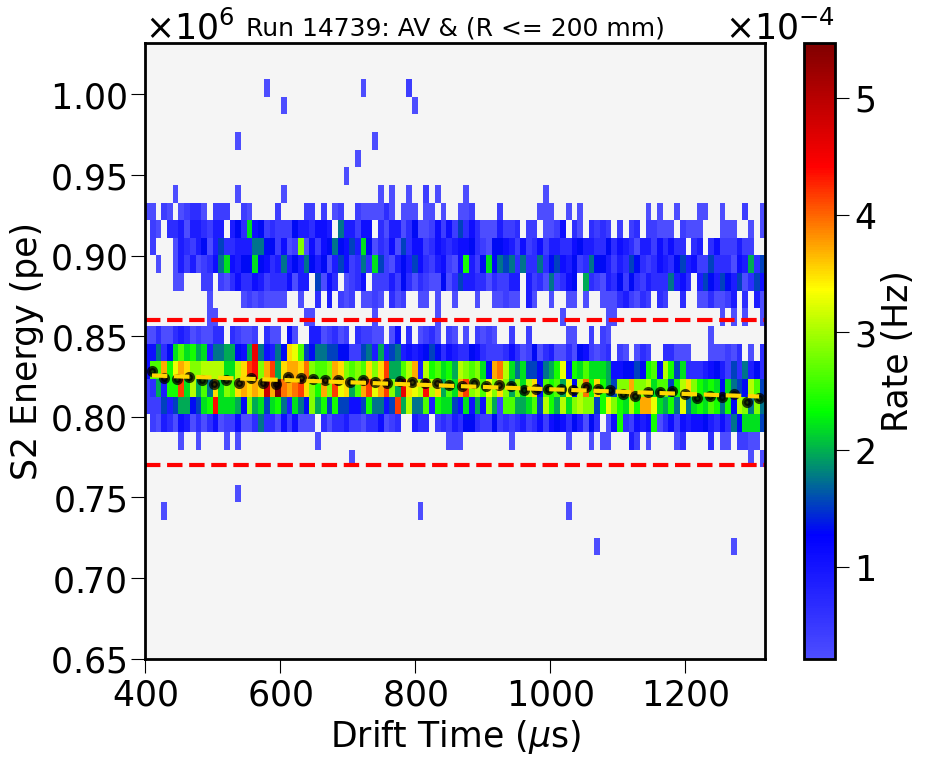

In [25]:
# Global
rad_lim = 200
n_bins  = 200

# Use exponential decay function with b = 0
def exp_bfixed(x, N0, tau):
    return ff.exponential_decay(x, N0, tau, 0)

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    run_DAQe = (entry["OK"] / (entry["OK"] + entry["LOST"]))
    
    # Variables    
    E2 = data[run_id]['S2e']
    DT = data[run_id]['DT']
    R  = data[run_id]['R']
    
    # Masking
    rad_mask = (R <= rad_lim)
    E2_mask  = E2[AV_mask[run_id] & rad_mask]
    DT_mask  = DT[AV_mask[run_id] & rad_mask]

    # 2D histogram
    S2e_DT_map, ex, ey = pt.hist_2D(DT_mask, E2_mask, x_bins=150, y_bins=200)
    S2e_DT_map         = S2e_DT_map / (run_long * run_DAQe)                           # Normalized by effective DAQ time
    S2e_DT_map         = np.ma.masked_where(S2e_DT_map==0, S2e_DT_map)                # Zero values masked
    # S2e_DT_map = np.clip(S2e_DT_map, 0, 50)                                           # Clipped values in colorbar

    # ----- Exponential Fit ----- #
    # Preliminar fitting: important define the limits of your fit!
    # if run_id == 14582:   # EL = 6 kV
    #     E2_down = 480e3;  E2_up = 550e3
    #     DT_down = 100;    DT_up = DT_mask.max()
    # elif run_id == 14601: # EL = 7 kV
    #     E2_down = 650e3;  E2_up = 740e3
    #     DT_down = 200;    DT_up = DT_mask.max()
    # elif run_id == 14608: # EL = 8 kV
    #     E2_down = 830e3;  E2_up = 930e3
    #     DT_down = 300;    DT_up = DT_mask.max()
    # elif run_id == 14704: # EL = 9 kV
    #     E2_down = 1035e3; E2_up = 1135e3
    #     DT_down = 600;    DT_up = DT_mask.max()
    # else:
    #     print(f'Is there the run {run_id} with us?')
    
    # NO scan!
    DT_down = 400;    DT_up = DT_mask.max()
    E2_down = 770e3;  E2_up = 860e3
    if run_id in {14803, 14804, 14814, 14815, 14816, 14817, 14828}:
        DT_down = 300;    DT_up = DT_mask.max()
        E2_down = 685e3;  E2_up = 765e3
    elif run_id in {14829, 14834, 14835, 14837, 14838, 14839, 14840}:
        DT_down = 250;    DT_up = DT_mask.max()
        E2_down = 870e3;  E2_up = 950e3

    # Filter the data for the fit
    fit_region_mask = (DT_mask >= DT_down) & (DT_mask <= DT_up) & \
                      (E2_mask >= E2_down) & (E2_mask <= E2_up)
    DT_fit = DT_mask[fit_region_mask]
    E2_fit = E2_mask[fit_region_mask]

    DT_centers, S2e_means, S2e_means_err = ff.create_profile(DT_fit, E2_fit, bins=50, statistic='mean')

    # Filtrar puntos donde el error es cero (bines con 1 solo evento)
    valid_points = S2e_means_err > 0
    DT_centers   = DT_centers[valid_points]
    S2e_means     = S2e_means[valid_points]
    S2e_means_err = S2e_means_err[valid_points]

    # Fit
    # Definte the cost function + initial guess
    least_squares = LeastSquares(DT_centers, S2e_means, S2e_means_err, exp_bfixed)
    # Initial guess
    init_guess = [S2e_means.max(), (DT_centers.max() - DT_centers.min()) / 2]
    print(f'\nInitial guess: N0 = {init_guess[0]:.4f} PE, tau = {init_guess[1]:.4f} μs')

    # Define the Minuit object
    m = Minuit(least_squares, *init_guess)
    m.limits["N0", "tau"] = (0, None)  # Ensure N0 and tau are positive

    # Minimization process of the cost function and error estimation
    m.migrad()
    m.hesse()
    
    # Results
    popt = m.values;  perr = m.errors
    print(f'Run {run_id} fit: N0 = {popt[0]:.2f} ± {perr[0]:.2f} PE, τ = {popt[1] / 1e3:.2f} ± {perr[1] / 1e3:.2f} ms')
    fit_parameters[run_id]["S2e"] = {"CV_N0": popt[0], "Error_N0": perr[0], "CV_tau": popt[1], "Error_tau": perr[1]}
 
    # Reduced chi-square
    chi2 = m.fval
    ndof = len(DT_centers) - m.nfit
    print(f"χ² / ndof = {chi2 / ndof:.4f}\n")

    # ----- Plotting ----- #

    # Data
    plt.pcolormesh(ex, ey, S2e_DT_map.T, cmap=pt.custom_hsv, shading='auto')    
    cbar = plt.colorbar(label='Rate (Hz)', shrink=1.0)
    # cbar.formatter.set_powerlimits((-3, -3))

    # Fit
    fit_y = exp_bfixed(DT_centers, *popt)
    # # plt.errorbar(DT_centers, S2e_means, yerr=S2e_means_err, 
    #              fmt='o', color='green', ecolor='lightcoral', markersize=5, capsize=2, label='Profile (Media y Error)')
    plt.scatter(DT_centers, S2e_means, c='black', alpha=0.75, s=25)
    plt.plot(DT_centers, fit_y, c='gold', ls='--')

    plt.axhline(y=E2_up, c='red', ls='--')
    plt.axhline(y=E2_down, c='red', ls='--')

    # Styling
    plt.xlabel('Drift Time ($\mu$s)')
    plt.xlim(400, DT_mask.max())
    plt.ylabel('S2 Energy (pe)')
    plt.ylim(650e3, 1.2*E2_up)
    plt.ticklabel_format(axis='y', style='sci')
    plt.title(f'Run {run_id}: AV & (R <= {rad_lim} mm)', fontsize=18)

    plt.gca().set_facecolor("whitesmoke")
    #plt.savefig(f'images/stability/LT_fit_run{run_id}_{scan}.png', bbox_inches='tight')
    plt.show() 

#### Lifetime Evolution

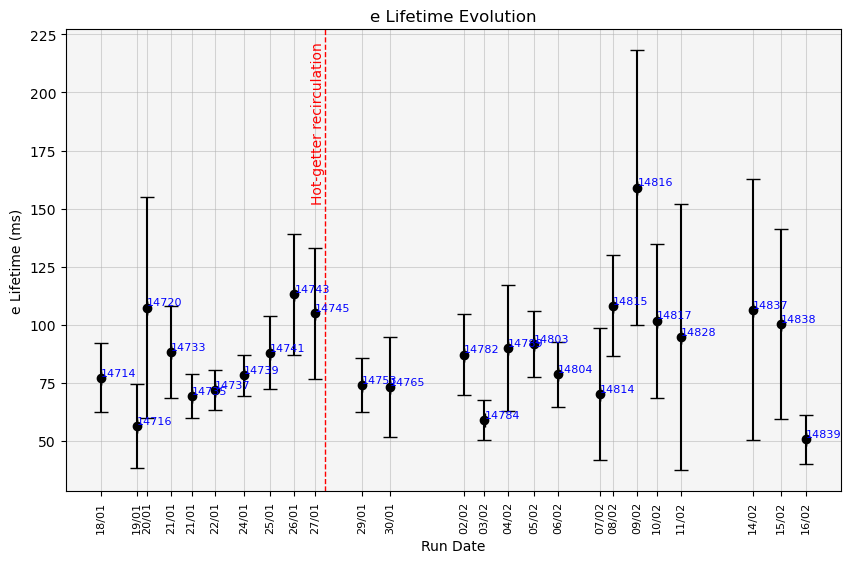

In [14]:
# Global
x_date = []

plt.figure(figsize=(10, 6))

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables    
    Date = data[run_id]['time']
    
    # Retrieve lifetime fit value   
    LT_CV    = fit_parameters[run_id]['S2e']['CV_tau']    / 1e3     # in [ms]
    LT_error = fit_parameters[run_id]['S2e']['Error_tau'] / 1e3
    
    # Mean date + error for each run
    Date_CV    = Date.mean()
    Date_error = Date.std() / np.sqrt(len(Date))
    x_date.append(Date_CV)

    # Plot: run voltage or run date?
    # plt.errorbar(run_volt, LT_CV, yerr=LT_error,
    #              fmt='o', c='black', ecolor='black', capsize=5)
    plt.errorbar(Date_CV, LT_CV, xerr=Date_error, yerr=LT_error,
                 fmt='o', c='black', ecolor='black', capsize=5)
    plt.text(Date_CV, LT_CV, str(run_id), fontsize=8, ha='left', va='bottom', color='blue')   # Run number near the point

# Convert x-axis bin edges to readable time format.
x_labels = [crudo.epoch_converter(t, h=False) for t in x_date]

# Styling
# plt.xlabel('EL Voltage (kV)')
plt.xlabel('Run Date')
plt.xticks(x_date, x_labels, rotation=90, ha='center', fontsize=8)
plt.ylabel('e Lifetime (ms)')
# plt.ylim(0, 500)
plt.title(f'e Lifetime Evolution')
plt.axvline(x=1737975600, c='red', ls='--', lw=1)
plt.text(1737975600, 187, 'Hot-getter recirculation', c='red', va='center',  ha='right',  rotation=90)

plt.gca().set_facecolor("whitesmoke")
plt.grid(True, linestyle='-', linewidth=0.75, alpha=0.5)
plt.savefig(f'images/stability/LT_evolution.png', bbox_inches='tight')
plt.show()

#### N$_{0}$ Evolution

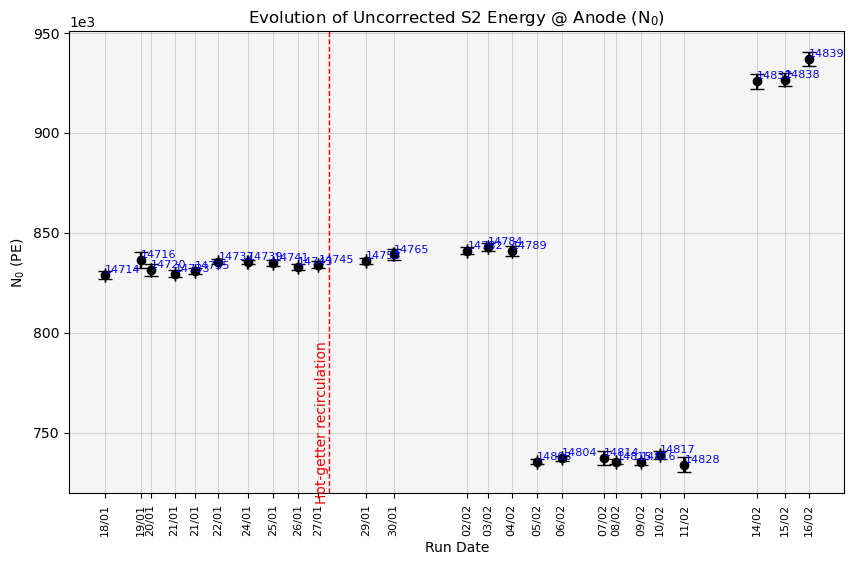

In [15]:
# Global
x_date = []

plt.figure(figsize=(10, 6))

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables    
    Date = data[run_id]['time']
    
    # Retrieve lifetime fit value   
    N0_CV    = fit_parameters[run_id]['S2e']['CV_N0']
    N0_error = fit_parameters[run_id]['S2e']['Error_N0']
    
    # Mean date + error for each run
    Date_CV    = Date.mean()
    Date_error = Date.std() / np.sqrt(len(Date))
    x_date.append(Date_CV)

    # Plot:
    # plt.errorbar(run_volt, LT_CV, yerr=LT_error,
    #              fmt='o', c='black', ecolor='black', capsize=5)
    plt.errorbar(Date_CV, N0_CV, xerr=Date_error, yerr=N0_error,
                 fmt='o', c='black', ecolor='black', capsize=5)
    plt.text(Date_CV, N0_CV, str(run_id), fontsize=8, ha='left', va='bottom', color='blue')   # Run number near the point

# Convert x-axis bin edges to readable time format.
x_labels = [crudo.epoch_converter(t, h=False) for t in x_date]

# Styling
# plt.xlabel('EL Voltage (kV)')
plt.xlabel('Run Date')
plt.xticks(x_date, x_labels, rotation=90, ha='center', fontsize=8)
plt.ylabel('N$_{0}$ (PE)')
# plt.ylim(0, 100)
plt.ticklabel_format(axis='y', style='sci', scilimits=(3, 3))
plt.title(f'Evolution of Uncorrected S2 Energy @ Anode (N$_{0}$)')
plt.axvline(x=1737975600, c='red', ls='--', lw=1)
plt.text(1737975600, 755e3, 'Hot-getter recirculation', c='red', va='center',  ha='right',  rotation=90)

plt.gca().set_facecolor("whitesmoke")
plt.grid(True, linestyle='-', linewidth=0.75, alpha=0.5)
plt.savefig(f'images/stability/N0_evolution.png', bbox_inches='tight')
plt.show()

## $S2e$ Maps Evolution

#### Tiny bins

Run 14601 as reference!


/tmp/ipykernel_2781/346715487.py:46: RuntimeWarning: divide by zero encountered in true_divide
  ratio_map = np.divide(S2e_map, Ref_map, where=Ref_map!=0)                                    # Avoid divisions by zero!
/tmp/ipykernel_2781/346715487.py:46: RuntimeWarning: invalid value encountered in true_divide
  ratio_map = np.divide(S2e_map, Ref_map, where=Ref_map!=0)                                    # Avoid divisions by zero!


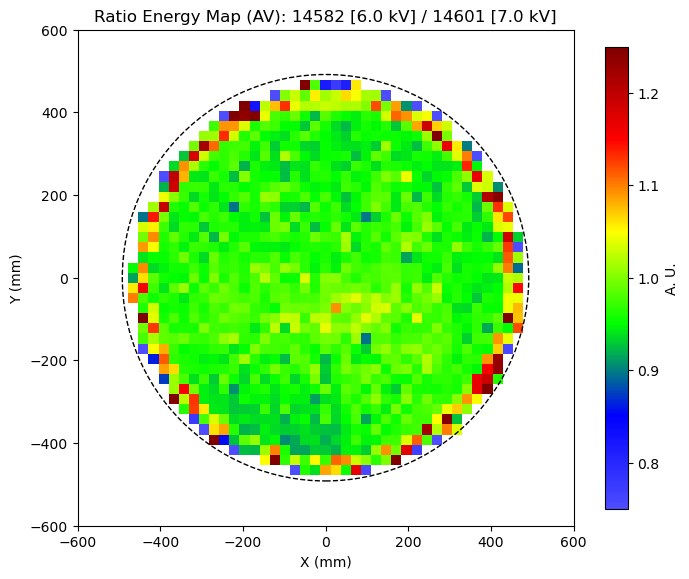

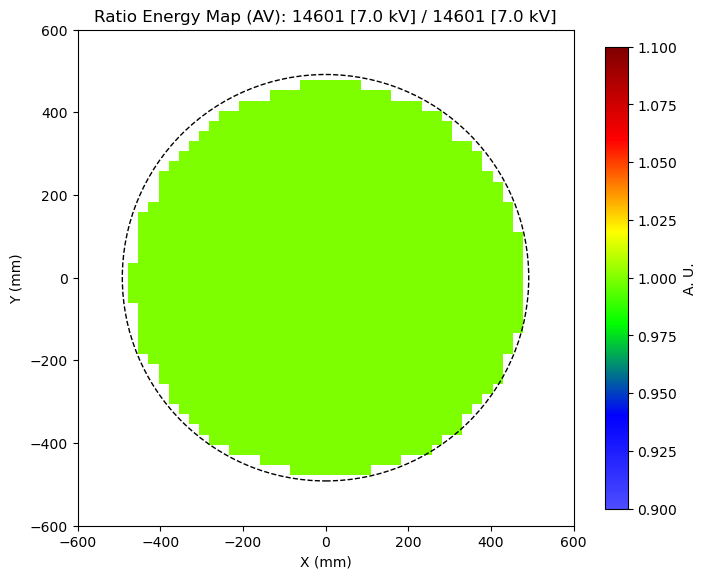

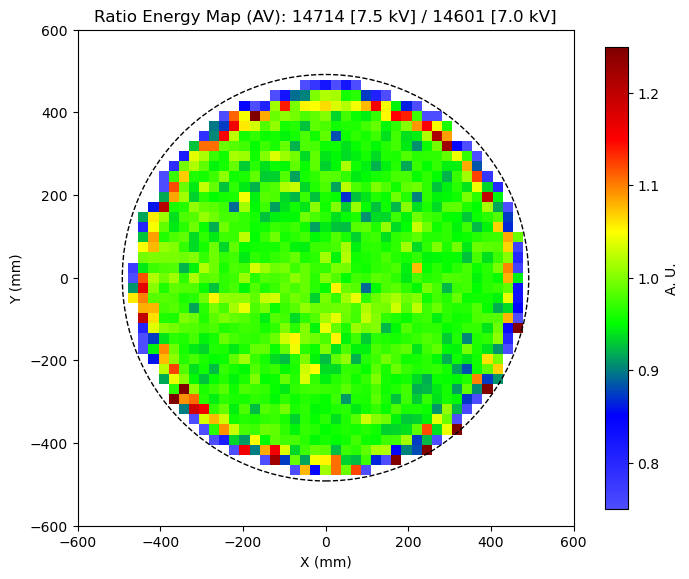

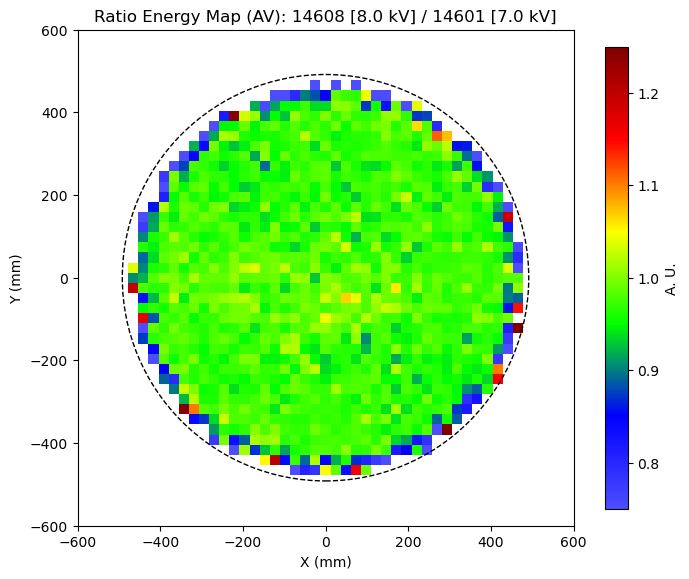

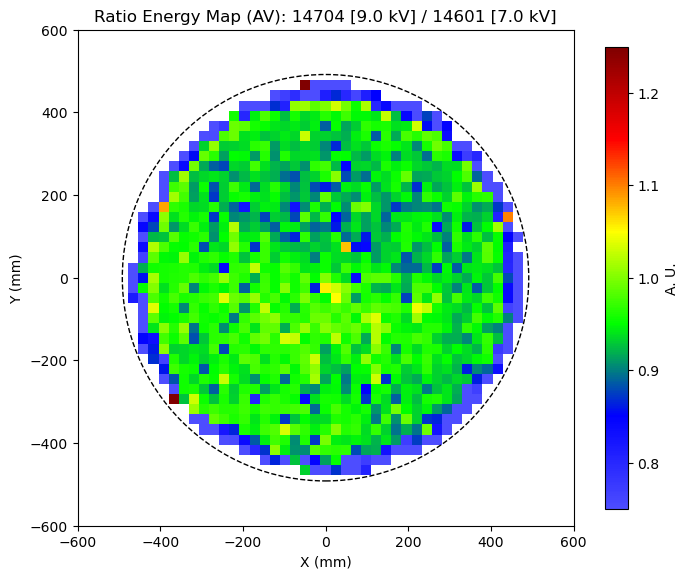

In [98]:
# Global
n_bins  = 50

# Select the reference map: just change the position in runs_info
run_ref = runs_info[1]
ref_id   = run_ref["run_number"]
ref_volt = run_ref[scan_key] / 1e3 
print(f"Run {ref_id} as reference!")

# Variables 
X_ref  = data[ref_id]['X']
Y_ref  = data[ref_id]['Y']
E2_ref = data[ref_id]['S2e']

# Masking
X_ref_mask  = X_ref[AV_mask[ref_id]]
Y_ref_mask  = Y_ref[AV_mask[ref_id]]
E2_ref_mask = E2_ref[AV_mask[ref_id]]

# Map
Ref_map, ex, ey = pt.mapping(X_ref_mask, Y_ref_mask, wei=E2_ref_mask, xy_bins=n_bins, norm=True)
Ref_map         = np.ma.masked_where(Ref_map==0, Ref_map)                                            # Zero values masked 

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables 
    X  = data[run_id]['X']
    Y  = data[run_id]['Y']
    E2 = data[run_id]['S2e']
    
    # Masking
    X_mask  = X[AV_mask[run_id]]
    Y_mask  = Y[AV_mask[run_id]]
    E2_mask = E2[AV_mask[run_id]]
    
    # Map
    S2e_map, ex, ey = pt.mapping(X_mask, Y_mask, wei=E2_mask, xy_bins=n_bins, norm=True)
    S2e_map         = np.ma.masked_where(S2e_map==0, S2e_map)                                    # Zero values masked
    
    # Ratio of maps
    ratio_map = np.divide(S2e_map, Ref_map, where=Ref_map!=0)                                    # Avoid divisions by zero! 
    ratio_map = np.ma.masked_where(ratio_map==0, ratio_map)                                      # Zero values masked
    ratio_map = np.clip(ratio_map, 0.75, 1.25)                                                   # Clipped values in colorbar

    # Plot
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(ex, ey, ratio_map.T, cmap=pt.custom_hsv, shading='auto')    
    cbar = plt.colorbar(label='A. U.', shrink=0.75)
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
    plt.title(f'Ratio Energy Map (AV): {run_id} [{run_volt} kV] / {ref_id} [{ref_volt} kV]')
    # Active NEXT-100 cross-section
    circle  = plt.Circle((0, 0), pt.N100_rad, color='black', fill=False, linestyle='--')
    plt.gca().add_patch(circle)
    plt.gca().set_aspect('equal', adjustable='box')
    
    #plt.savefig(f'images/stability/something.png', bbox_inches='tight')
    plt.show() 

#### Big bins

Run 14601 as reference!


/tmp/ipykernel_2781/2505739808.py:46: RuntimeWarning: divide by zero encountered in true_divide
  ratio_map = np.divide(S2e_map, Ref_map, where=Ref_map!=0)                                   # Avoid divisions by zero!
/tmp/ipykernel_2781/2505739808.py:46: RuntimeWarning: invalid value encountered in true_divide
  ratio_map = np.divide(S2e_map, Ref_map, where=Ref_map!=0)                                   # Avoid divisions by zero!


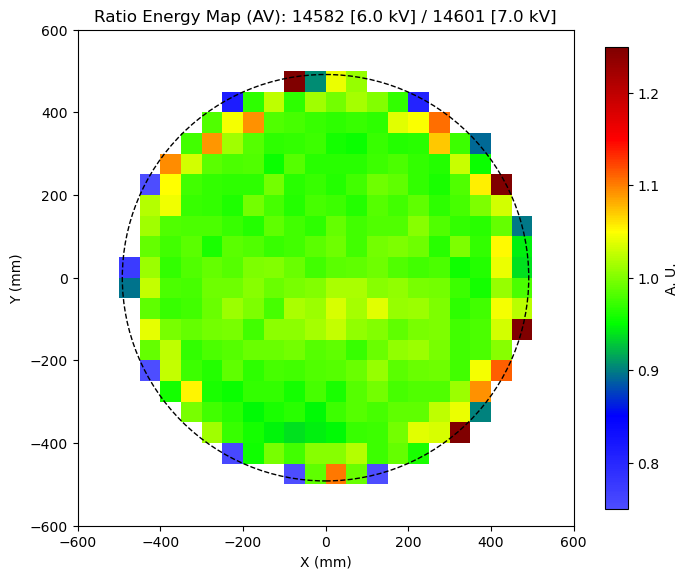

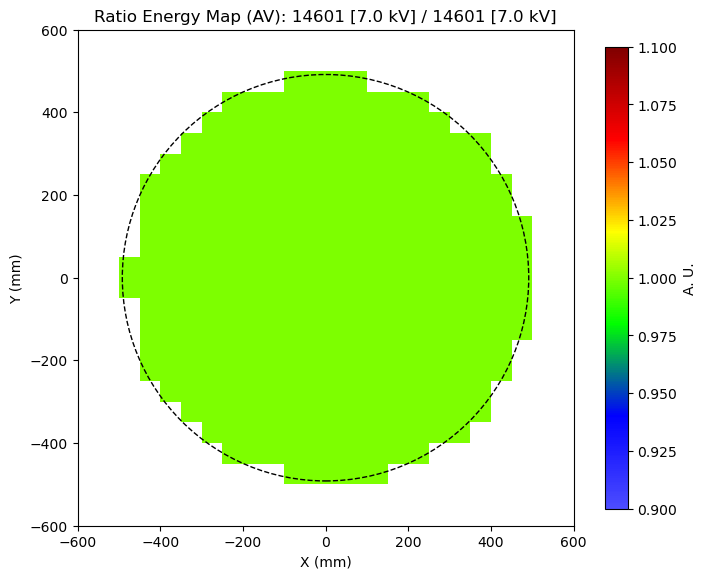

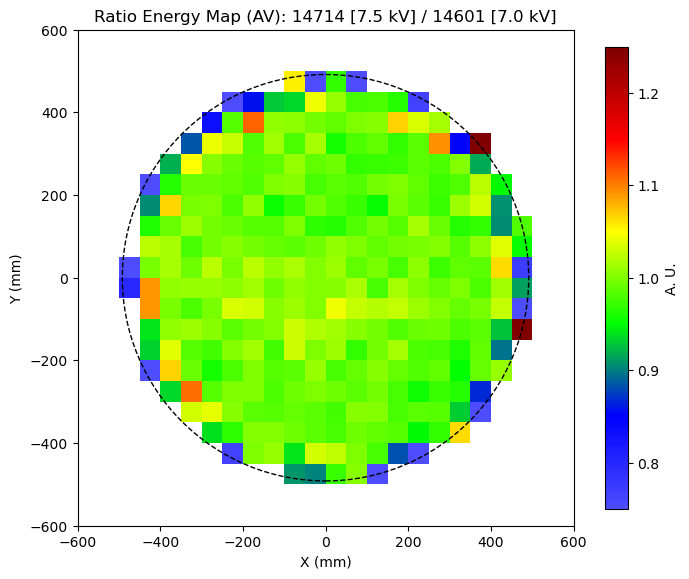

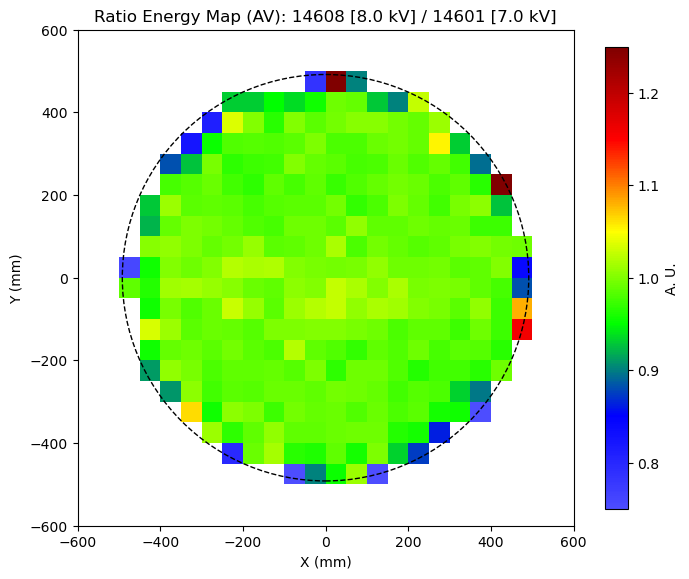

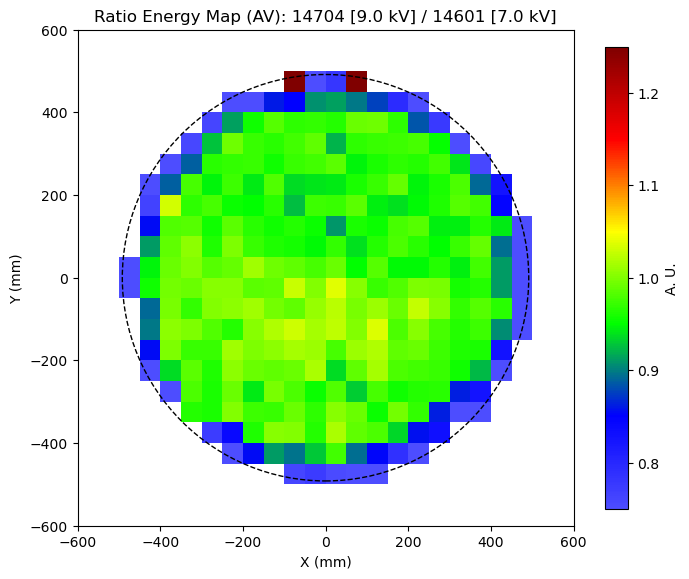

In [81]:
# Global
n_bins  = 25

# Select the reference map: just change the position in runs_info
run_ref = runs_info[1]
ref_id   = run_ref["run_number"]
ref_volt = run_ref[scan_key] / 1e3 
print(f"Run {ref_id} as reference!")

# Variables 
X_ref  = data[ref_id]['X']
Y_ref  = data[ref_id]['Y']
E2_ref = data[ref_id]['S2e']

# Masking
X_ref_mask  = X_ref[AV_mask[ref_id]]
Y_ref_mask  = Y_ref[AV_mask[ref_id]]
E2_ref_mask = E2_ref[AV_mask[ref_id]]

# Map
Ref_map, ex, ey = pt.mapping(X_ref_mask, Y_ref_mask, wei=E2_ref_mask, xy_bins=n_bins, norm=True)
Ref_map         = np.ma.masked_where(Ref_map==0, Ref_map)                                            # Zero values masked

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables 
    X  = data[run_id]['X']
    Y  = data[run_id]['Y']
    E2 = data[run_id]['S2e']
    
    # Masking
    X_mask  = X[AV_mask[run_id]]
    Y_mask  = Y[AV_mask[run_id]]
    E2_mask = E2[AV_mask[run_id]]
    
    # Map
    S2e_map, ex, ey = pt.mapping(X_mask, Y_mask, wei=E2_mask, xy_bins=n_bins, norm=True)
    S2e_map         = np.ma.masked_where(S2e_map==0, S2e_map)                                   # Zero values masked
    
    # Ratio of maps
    ratio_map = np.divide(S2e_map, Ref_map, where=Ref_map!=0)                                   # Avoid divisions by zero! 
    ratio_map = np.ma.masked_where(ratio_map==0, ratio_map)                                     # Zero values masked
    ratio_map = np.clip(ratio_map, 0.75, 1.25)                                                  # Clipped values in colorbar

    # Plot
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(ex, ey, ratio_map.T, cmap=pt.custom_hsv, shading='auto')
    cbar = plt.colorbar(label='A. U.', shrink=0.75)
    plt.xlabel('X (mm)')
    plt.ylabel('Y (mm)')
    plt.title(f'Ratio Energy Map (AV): {run_id} [{run_volt} kV] / {ref_id} [{ref_volt} kV]')
    # Active NEXT-100 cross-section
    circle = plt.Circle((0, 0), pt.N100_rad, color='black', fill=False, linestyle='--')
    plt.gca().add_patch(circle)
    plt.gca().set_aspect('equal', adjustable='box')
    
    #plt.savefig(f'images/stability/something.png', bbox_inches='tight')
    plt.show() 

## $S2e$ Corrections

In [44]:
# Store the S2 energy fit information
E1_parameters = {run["run_number"]: {} for run in runs_info}
E2_parameters = {run["run_number"]: {} for run in runs_info}

In [26]:
# Global
n_bins = 50

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    
    # Fit parameters for energy corrections
    CV_fit = [fit_parameters[run_id]['S1e']['CV_m'],  fit_parameters[run_id]['S1e']['CV_b']]
    LT_fit = [fit_parameters[run_id]['S2e']['CV_N0'], fit_parameters[run_id]['S2e']['CV_tau']]

    # Apply corrections
    data[run_id] = crudo.correct_S1e(data[run_id], CV_fit, DT_stop[run_id], output_column='S1e_corr')     # S1 energy
    data[run_id] = crudo.correct_S2e_LT(data[run_id], LT_fit, output_column='S2e_corr_LT')                # S2 energy by lifetime
    
    # # Inputs of correction by lifetime
    # CV_fit = [fit_parameters[run_id]['S2e']['CV_N0'], fit_parameters[run_id]['S2e']['CV_tau']]
    # # Corrections to all S2e data
    # data[run_id] = crudo.correct_S2e_LT(data[run_id], CV_fit, output_column='S2e_corr_LT')                            # Lifetime
    data[run_id] = crudo.correct_S2e_map(data[run_id], AV_mask[run_id], xy_bins=n_bins, input_column='S2e_corr_LT')     # Energy map

#### E1 corrected?

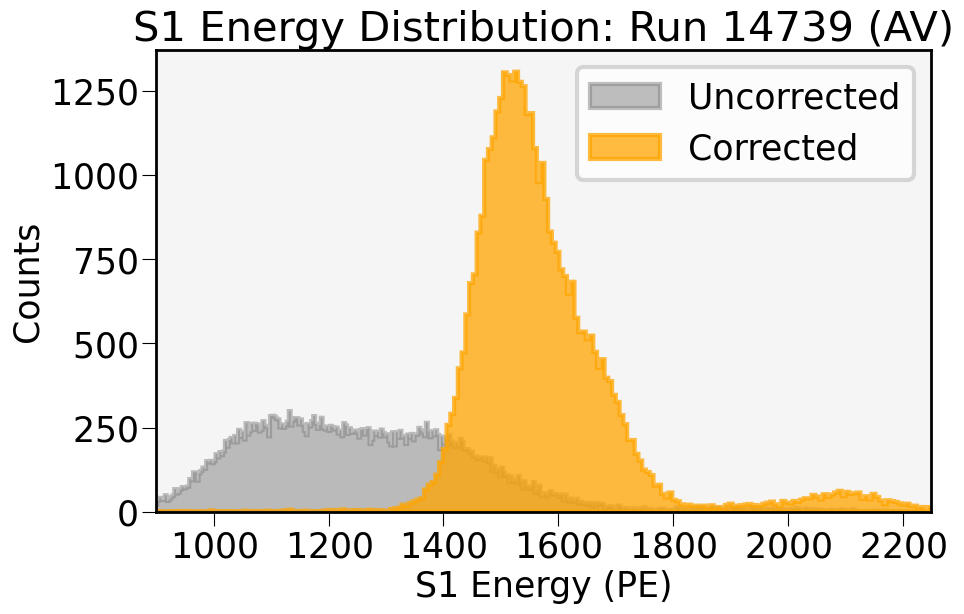

In [28]:
# Global
n_bins  = 500

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables    
    E1      = data[run_id]['S1e']
    E1_corr = data[run_id]['S1e_corr']
    
    # Masking
    E1_mask   = E1[AV_mask[run_id]]
    E1c_mask  = E1_corr[AV_mask[run_id]]
    
    # Limits
    E1_min = 1200;  E1_max = 1800
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.hist(E1_mask, bins=n_bins, histtype='stepfilled', color='grey', alpha=0.50, ec='grey', label='Uncorrected')
    plt.hist(E1c_mask, bins=n_bins,  histtype='stepfilled', color='orange', alpha=0.75, ec='orange', label='Corrected')
    plt.xlim(0.75*E1_min, 1.25*E1_max)
    plt.xlabel('S1 Energy (PE)')
    plt.ylabel('Counts')
    # plt.ticklabel_format(axis='x', style='sci', scilimits=(3,3))
    plt.title(f'S1 Energy Distribution: Run {run_id} (AV)')
    plt.legend()

    plt.gca().set_facecolor('whitesmoke')
    #plt.grid(True)
    #plt.savefig(f'images/stability/E1_correction_run{run_id}_{scan}.png', bbox_inches='tight')
    plt.show()

#### Bigaussian fit

NameError: name 'E2c_bins' is not defined

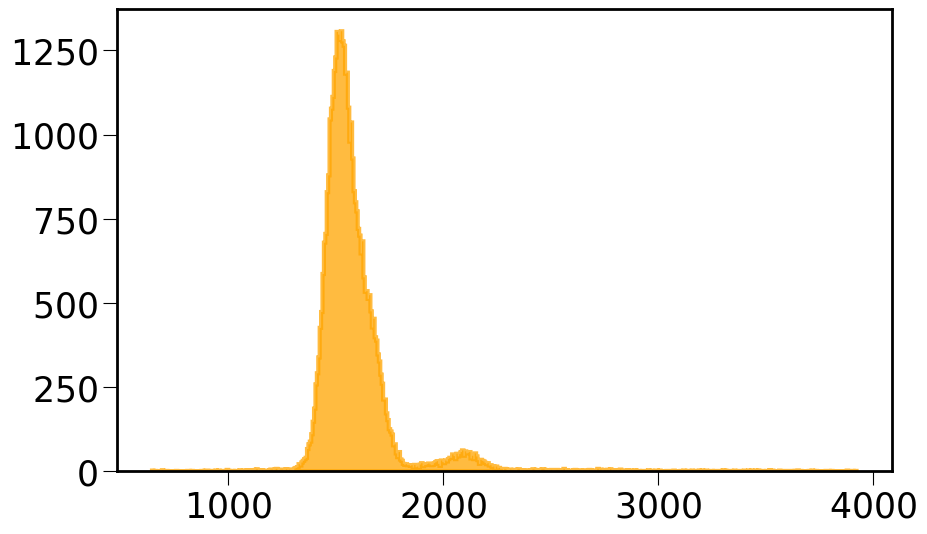

In [29]:
for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # S1 corrected
    E1_corr  = data[run_id]['S1e_corr']
    
    # Masking
    E1c_mask = E1_corr[AV_mask[run_id]]                                      
    
    # Store the corrected S2e data into a histogram
    plt.figure(figsize=(10, 6))
    E1c_counts, E1c_bins, _ = plt.hist(E1c_mask, bins=n_bins, histtype='stepfilled', 
                                       color='orange', alpha=0.75, ec='orange', label='Corrected')
    bin_width = np.diff(E2c_bins).mean()
    
    # NO scan!
    E1_min = 1300;  E1_max = 1900
    # p0 = [200, 1500, bin_width, 50, 1600, bin_width]
    p0 = [200, 1500, bin_width]
    if run_id in {14803, 14804, 14814, 14815, 14816, 14817, 14828}:
        E1_min = 1000;  E1_max = 1600
        # p0 = [200, 1350, bin_width, 50, 1425, bin_width]
        p0 = [200, 1350, bin_width]
    elif run_id in {14837, 14838, 14839}:
        E1_min = 1200;  E1_max = 2000
        # p0 = [200, 1650, bin_width, 50, 1800, bin_width]
        p0 = [200, 1650, bin_width]
        
    E1c_centers, E1c_values = ff.prefit_1D(E1c_bins, E1c_mask, E1c_counts, x_min=E1_min, x_max=E1_max)
    
    # Bigaussian fit
    print(f'Run {run_id} - Initial values: {p0}')
    popt, pcov = curve_fit(ff.gauss_func, E1c_centers, E1c_values, p0=p0)
    
    # Results
    print(f'Run {run_id} - Final values: {popt}') 
    perr = np.sqrt(np.diag(pcov))
    E1_parameters[run_id]["222Rn"] = {"CV_mu": popt[1], "Error_mu": perr[1], "CV_sigma": popt[2], "Error_sigma": perr[2]}
    fit_y = ff.gauss_func(E1c_centers, *popt)
    
    # Plot
    #plt.scatter(E2c_centers, E2c_values, c='black', alpha=1.0, s=10, zorder=3)
    plt.plot(E1c_centers, fit_y, color="red", lw=2, label="Fit")
    plt.xlabel('S1 Energy (PE)')
    plt.xlim(0.9*E1_min, 1.1*E1_max)
    plt.ylabel('Counts')
    # plt.ticklabel_format(axis='x', style='sci', scilimits=(3,3))
    plt.title(f'S1 Energy Distribution: Run {run_id} (AV)')
    plt.legend()

    plt.gca().set_facecolor('whitesmoke')
    #plt.savefig(f'images/stability/E1_fit_run{run_id}_{scan}.png', bbox_inches='tight')
    #plt.grid(True)
    plt.show()

### E2 corrected?

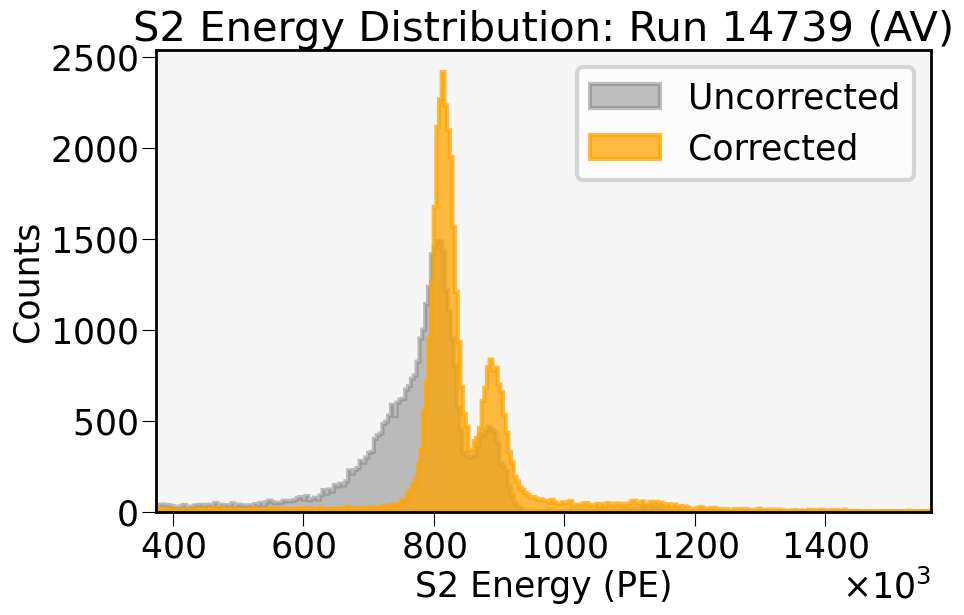

In [30]:
# Global
n_bins  = 500

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables    
    E2      = data[run_id]['S2e']
    E2_corr = data[run_id]['S2e_corr']
    
    # Masking
    E2_mask   = E2[AV_mask[run_id]]
    E2c_mask  = E2_corr[AV_mask[run_id]]
    
    # # Energy limits: usefuls for fit 
    # if run_id == 14582:   # EL = 6 kV
    #     E2_min = 450e3;  E2_max = 650e3
    # elif run_id == 14601: # EL = 7 kV
    #     E2_min = 600e3;  E2_max = 850e3
    # elif run_id == 14608: # EL = 8 kV
    #     E2_min = 750e3;  E2_max = 1100e3
    # elif run_id == 14704: # EL = 9 kV
    #     E2_min = 975e3; E2_max = 1325e3
    # else:
    #     print(f'Is there the run {run_id} with us?')
    
    # NO scan!
    E2_min = 500e3;  E2_max = 1250e3

    # Plot
    plt.figure(figsize=(10, 6))
    plt.hist(E2_mask, bins=n_bins, histtype='stepfilled', color='grey', alpha=0.50, ec='grey', label='Uncorrected')
    plt.hist(E2c_mask, bins=n_bins,  histtype='stepfilled', color='orange', alpha=0.75, ec='orange', label='Corrected')
    plt.xlim(0.75*E2_min, 1.25*E2_max)
    plt.xlabel('S2 Energy (PE)')
    plt.ylabel('Counts')
    plt.ticklabel_format(axis='x', style='sci', scilimits=(3,3))
    plt.title(f'S2 Energy Distribution: Run {run_id} (AV)')
    plt.legend()

    plt.gca().set_facecolor('whitesmoke')
    #plt.grid(True)
    #plt.savefig(f'images/stability/E2_correction_run{run_id}_{scan}.png', bbox_inches='tight')
    plt.show()

#### Bigaussian fit

Run 14714 - Initial values: [200, 830000.0, 1981.4831405115547, 50, 930000.0, 1981.4831405115547]
Run 14714 - Final values: [7.80527379e+02 8.23229642e+05 1.76927537e+04 2.61063297e+02
 8.97210368e+05 2.23090566e+04]


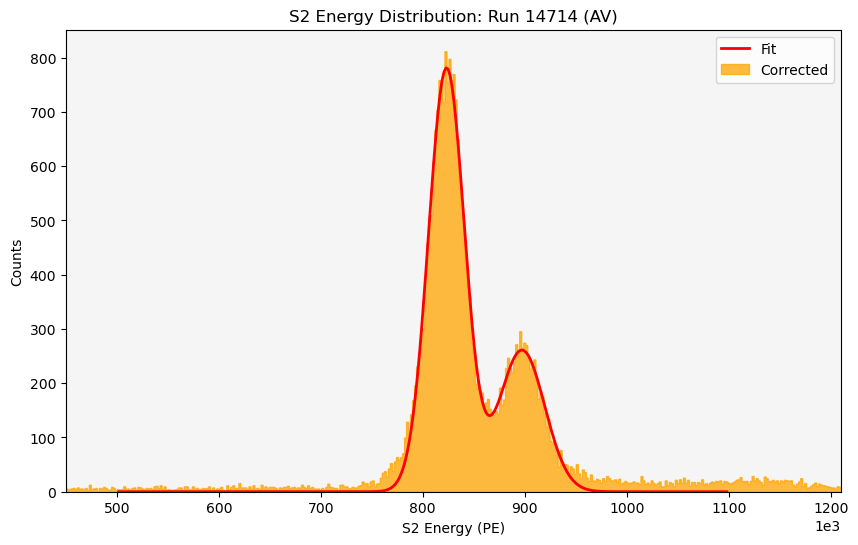

Run 14716 - Initial values: [200, 830000.0, 1974.874578130873, 50, 930000.0, 1974.874578130873]
Run 14716 - Final values: [4.89047855e+01 9.09573644e+05 3.97024378e+04 2.12911439e+02
 9.19125852e+05 7.82461170e+02]


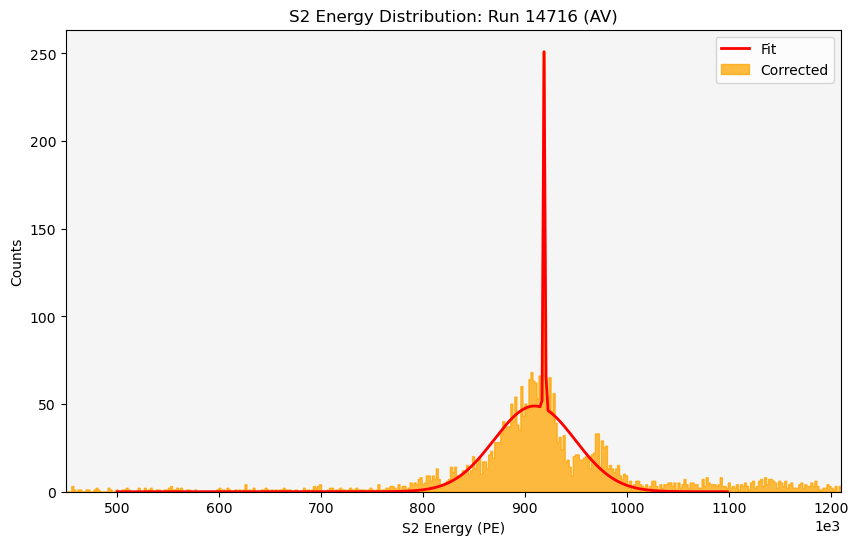

Run 14720 - Initial values: [200, 830000.0, 1953.3877306312024, 50, 930000.0, 1953.3877306312024]
Run 14720 - Final values: [8.37956273e+01 8.50295841e+05 2.46151203e+04 6.34238870e+01
 8.94498252e+05 7.38722753e+04]


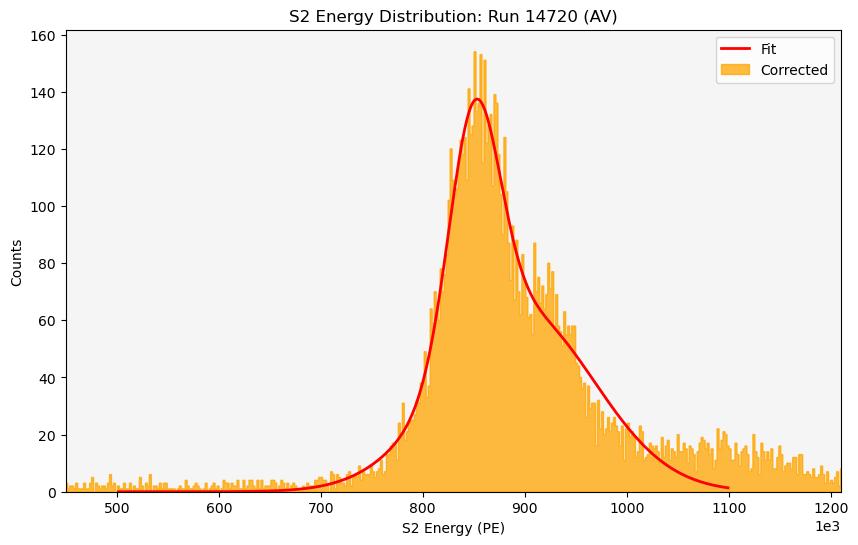

Run 14733 - Initial values: [200, 830000.0, 1930.0471826256264, 50, 930000.0, 1930.0471826256264]
Run 14733 - Final values: [5.75592640e+02 8.34243888e+05 1.83990154e+04 2.07099756e+02
 9.09483623e+05 2.35132635e+04]


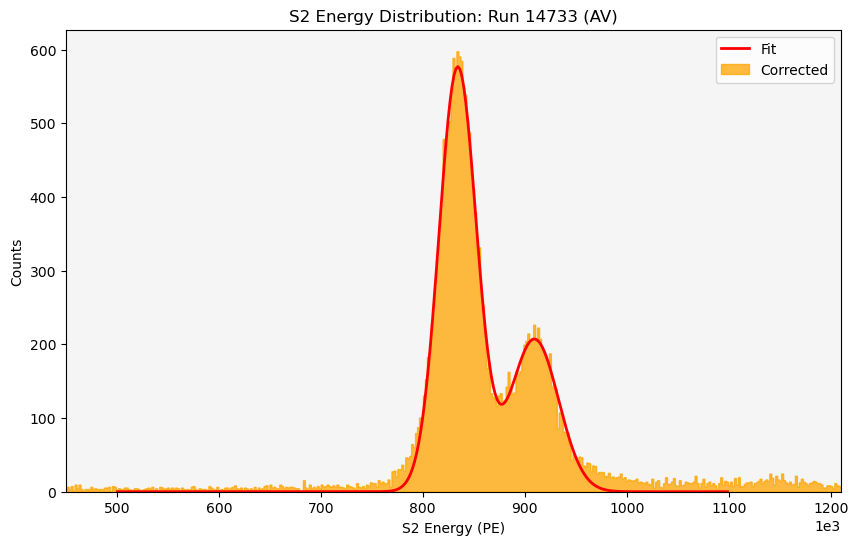

Run 14735 - Initial values: [200, 830000.0, 2241.662371248963, 50, 930000.0, 2241.662371248963]
Run 14735 - Final values: [1.13814897e+03 8.42028278e+05 1.79398127e+04 3.84026548e+02
 9.19041781e+05 2.25862962e+04]


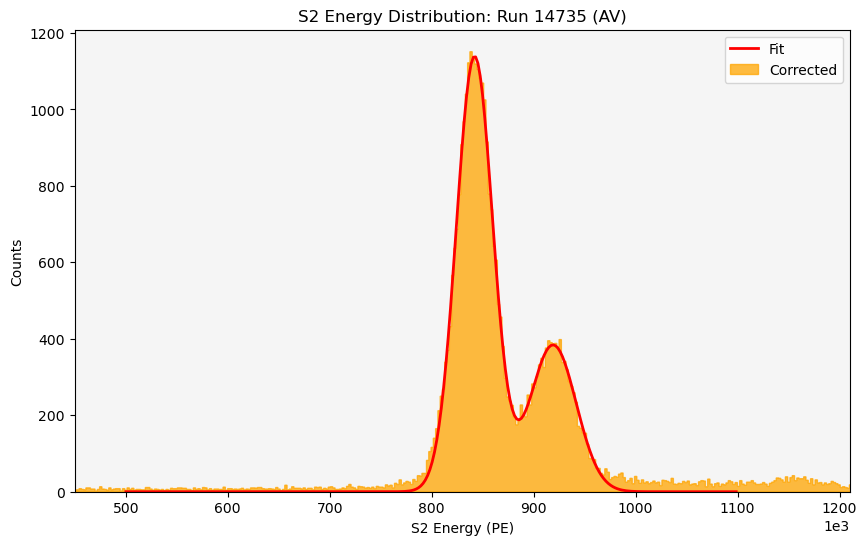

Run 14737 - Initial values: [200, 830000.0, 2158.2664173217113, 50, 930000.0, 2158.2664173217113]
Run 14737 - Final values: [-4.99724641e+02  8.43580532e+05 -1.52814424e+04  1.07345265e+03
  8.64139232e+05  2.50356027e+04]


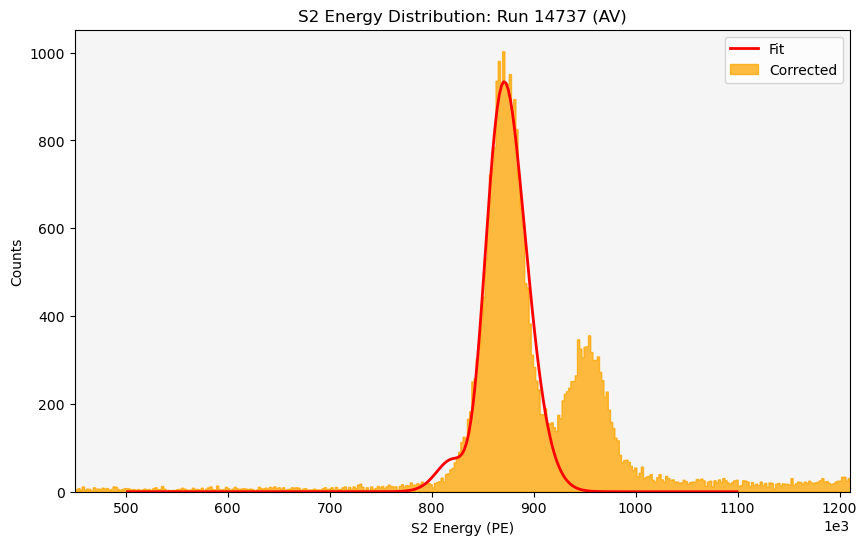

Run 14739 - Initial values: [200, 830000.0, 2027.259922701696, 50, 930000.0, 2027.259922701696]
Run 14739 - Final values: [1.16227267e+03 8.12218383e+05 1.69176621e+04 3.93768707e+02
 8.86860401e+05 2.09297579e+04]


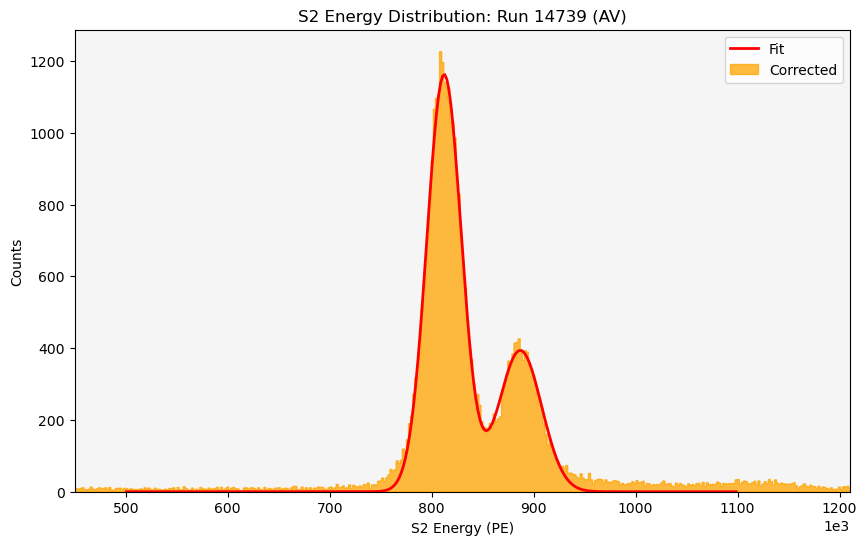

Run 14741 - Initial values: [200, 830000.0, 2003.0954207850668, 50, 930000.0, 2003.0954207850668]
Run 14741 - Final values: [1.14423014e+03 8.26471202e+05 1.70516369e+04 3.87729105e+02
 9.02833237e+05 2.06662904e+04]


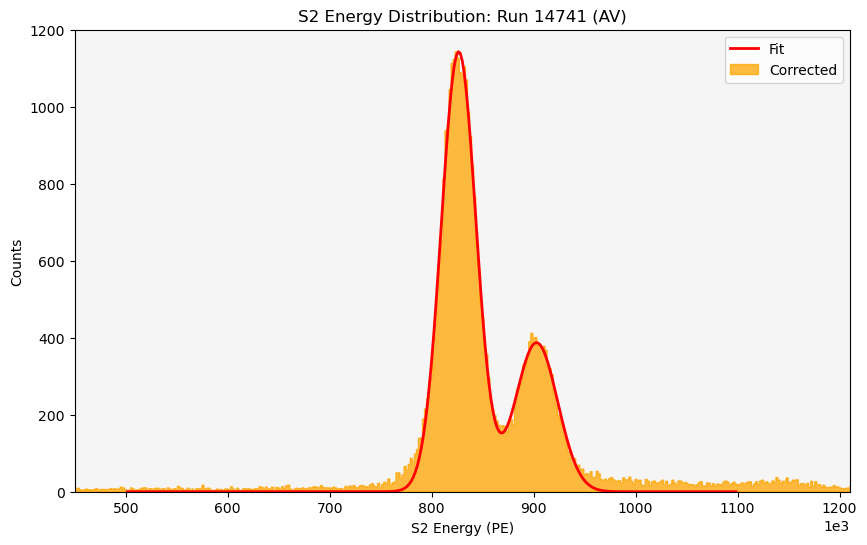

Run 14743 - Initial values: [200, 830000.0, 2175.6082269166486, 50, 930000.0, 2175.6082269166486]
Run 14743 - Final values: [1.07250369e+03 8.36721667e+05 1.79993439e+04 3.68224964e+02
 9.12867043e+05 2.23768926e+04]


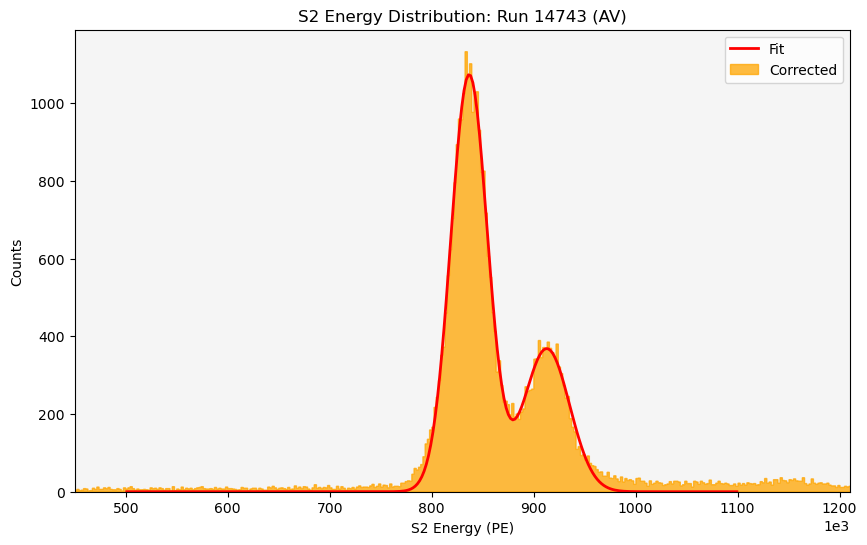

Run 14745 - Initial values: [200, 830000.0, 2095.4949762789042, 50, 930000.0, 2095.4949762789042]
Run 14745 - Final values: [6.28955477e+02 8.17480183e+05 1.47235309e+04 2.09647756e+02
 8.64239459e+05 5.46558676e+04]


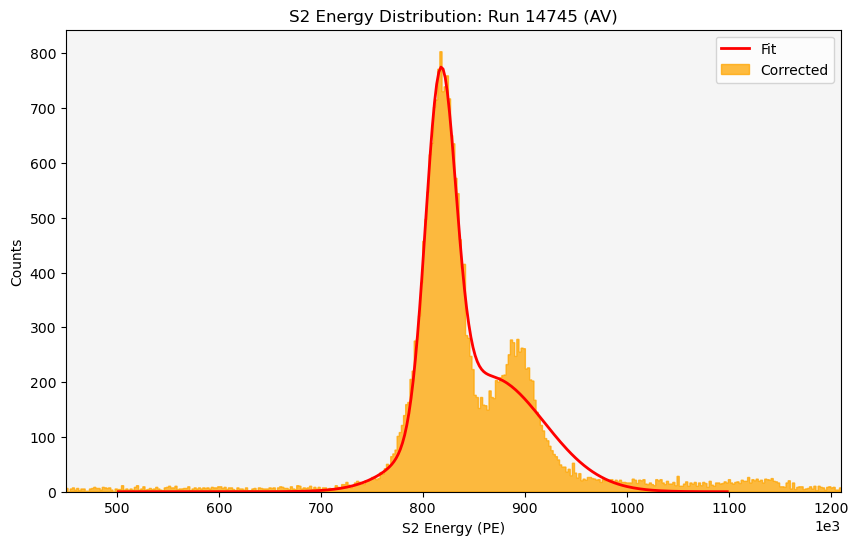

Run 14753 - Initial values: [200, 830000.0, 2313.7016706997206, 50, 930000.0, 2313.7016706997206]
Run 14753 - Final values: [1.02922086e+03 8.17890153e+05 1.81969564e+04 3.62719999e+02
 8.92698679e+05 2.17408118e+04]


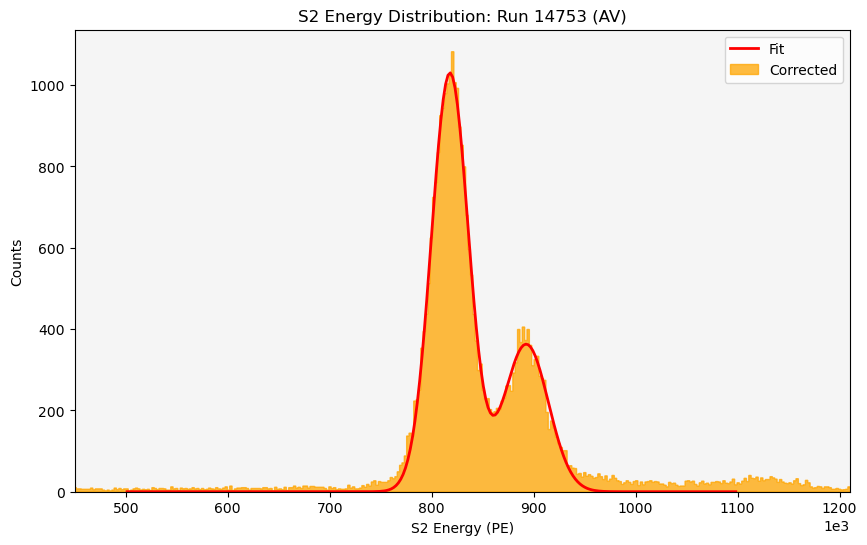

Run 14765 - Initial values: [200, 830000.0, 2202.247021626019, 50, 930000.0, 2202.247021626019]
Run 14765 - Final values: [1.19928034e+02 8.25847090e+05 2.23641268e+04 6.99877196e+01
 8.76405686e+05 8.07842807e+04]


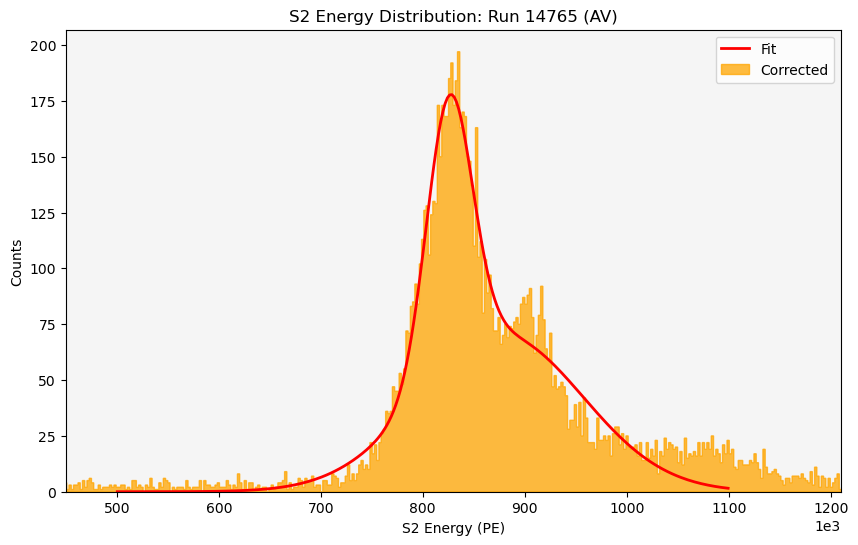

Run 14782 - Initial values: [200, 830000.0, 2312.9830822905915, 50, 930000.0, 2312.9830822905915]
Run 14782 - Final values: [7.45543563e+02 8.34857739e+05 1.76272614e+04 2.66295487e+02
 9.08748247e+05 2.13020732e+04]


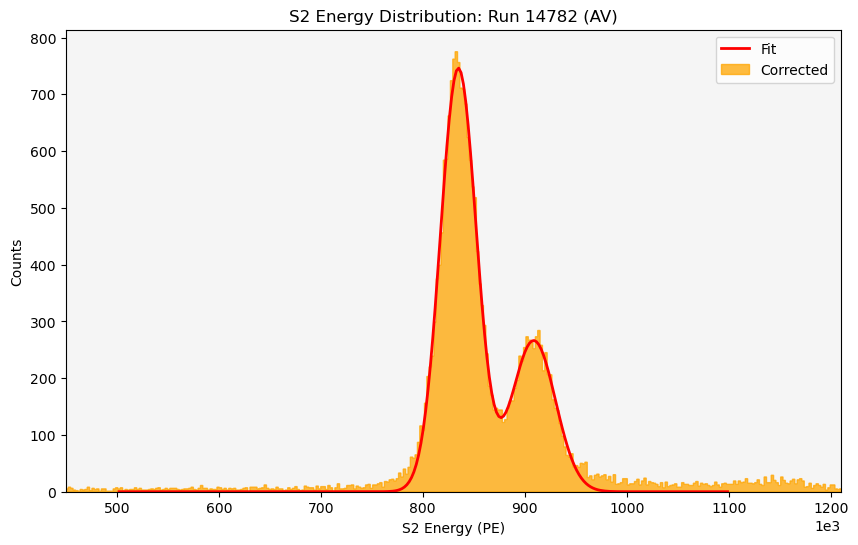

Run 14784 - Initial values: [200, 830000.0, 2393.953025401649, 50, 930000.0, 2393.953025401649]
Run 14784 - Final values: [4.54548881e+02 8.26008801e+05 1.82368815e+04 1.74027811e+02
 8.98665796e+05 1.82166788e+04]


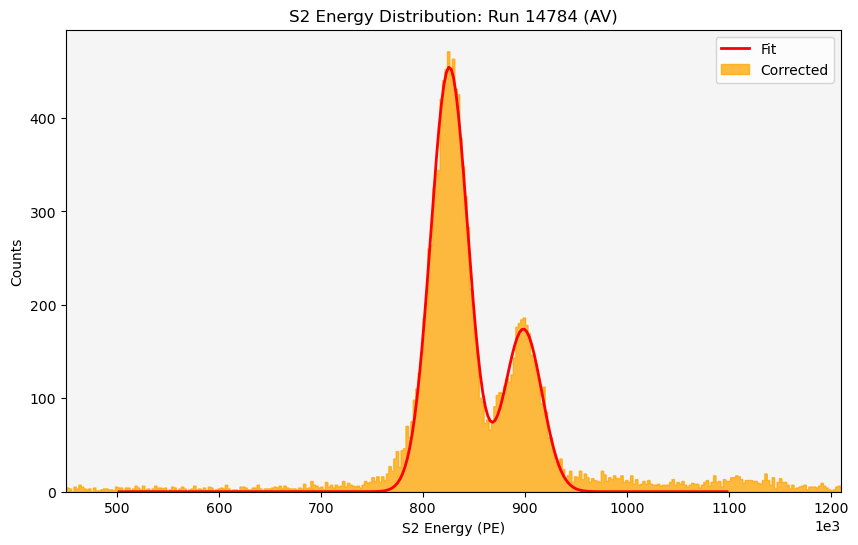

Run 14789 - Initial values: [200, 790000.0, 2127.213614558613, 50, 850000.0, 2127.213614558613]
Run 14789 - Final values: [3.97004429e+02 7.89075810e+05 1.82634436e+04 1.50386391e+02
 8.57756886e+05 1.79053364e+04]


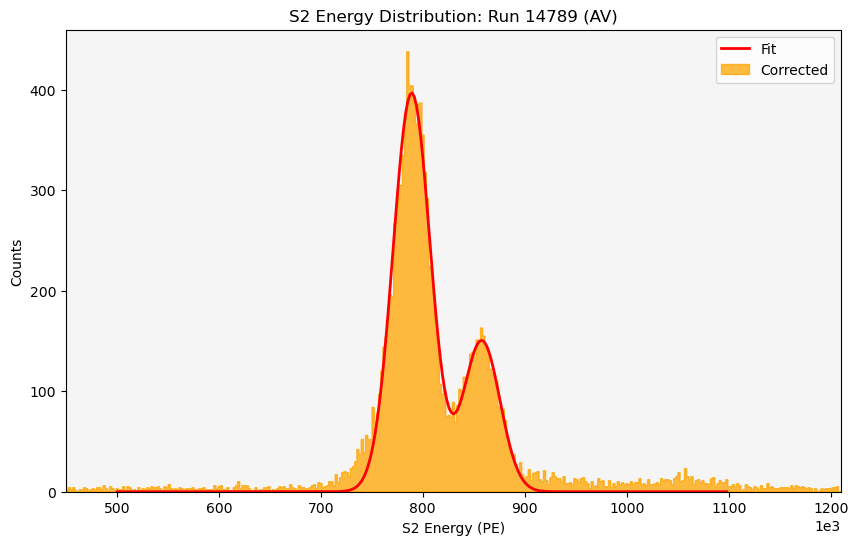

Run 14803 - Initial values: [200, 700000.0, 1966.728720213998, 50, 800000.0, 1966.728720213998]
Run 14803 - Final values: [1.62542479e+03 7.06188607e+05 1.30838149e+04 5.48583471e+02
 7.71557241e+05 1.92099457e+04]


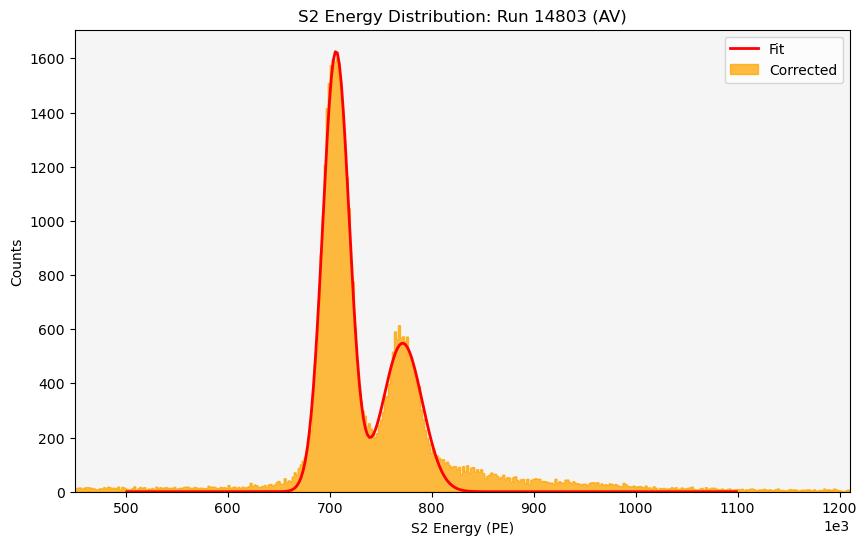

Run 14804 - Initial values: [200, 700000.0, 2537.9701997928005, 50, 800000.0, 2537.9701997928005]
Run 14804 - Final values: [1.46633253e+03 7.18953124e+05 1.34744406e+04 5.02041468e+02
 7.84750299e+05 1.80106598e+04]


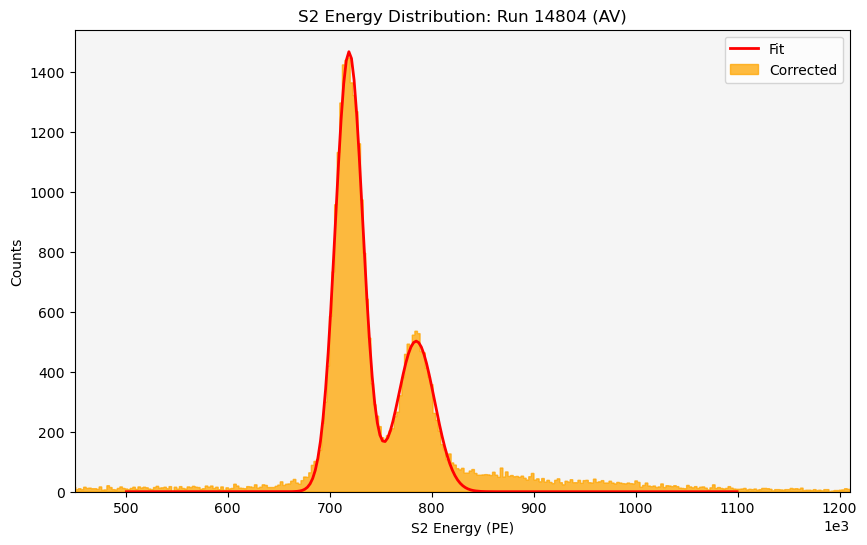

Run 14828 is mufeo!
Run 14815 - Initial values: [200, 700000.0, 2030.1676516389227, 50, 800000.0, 2030.1676516389227]
Run 14815 - Final values: [1.14493935e+03 6.55470527e+05 1.19888239e+04 3.71198837e+02
 7.15025726e+05 1.79714972e+04]


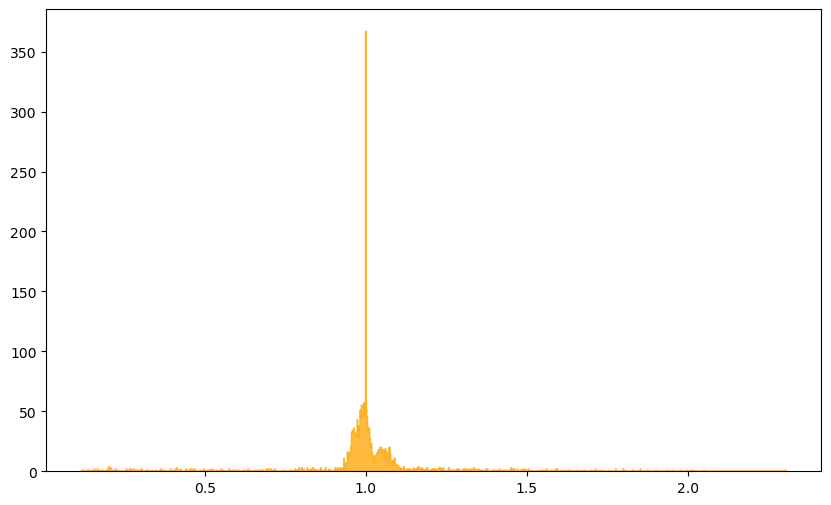

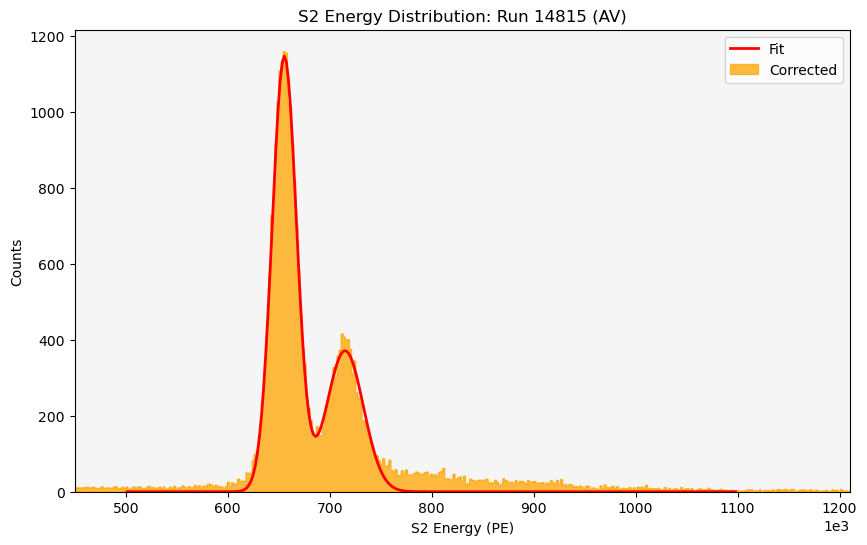

Run 14816 - Initial values: [200, 700000.0, 2714.7765242964347, 50, 800000.0, 2714.7765242964347]
Run 14816 - Final values: [1.18991731e+03 7.15095247e+05 1.31405541e+04 4.38701921e+02
 7.80077385e+05 1.70071014e+04]


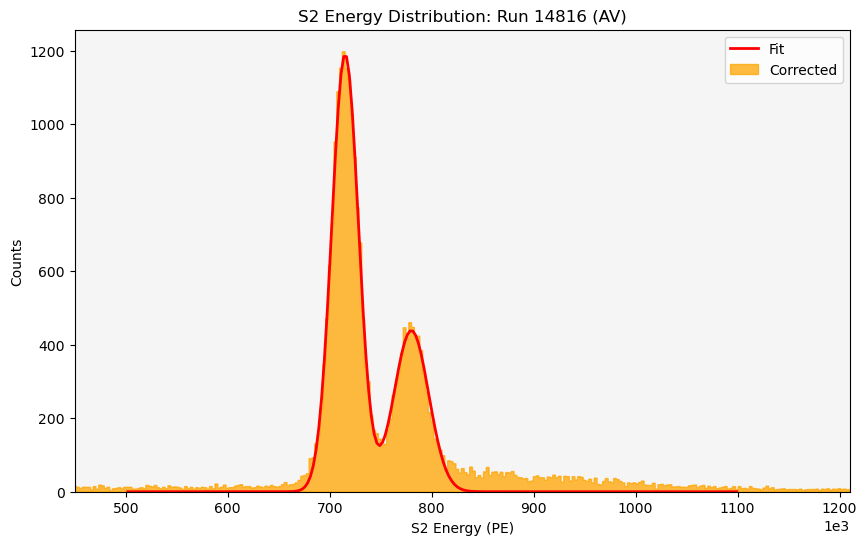

Run 14817 - Initial values: [200, 700000.0, 2346.741319877385, 50, 800000.0, 2346.741319877385]
Run 14817 - Final values: [4.70670938e+02 7.39036861e+05 1.47496216e+04 1.62969015e+02
 8.03592727e+05 1.95467448e+04]


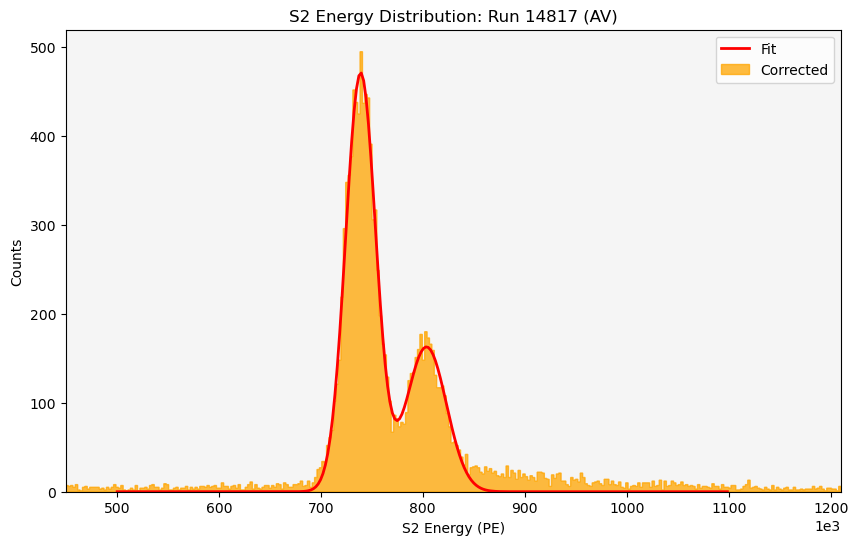

Run 14828 is mufeo!
Run 14837 - Initial values: [200, 900000.0, 2993.2852032997125, 50, 980000.0, 2993.2852032997125]
Run 14837 - Final values: [1.63964864e+02 9.02907407e+05 2.24062198e+04 5.51256934e+01
 9.71378891e+05 1.69047758e+04]


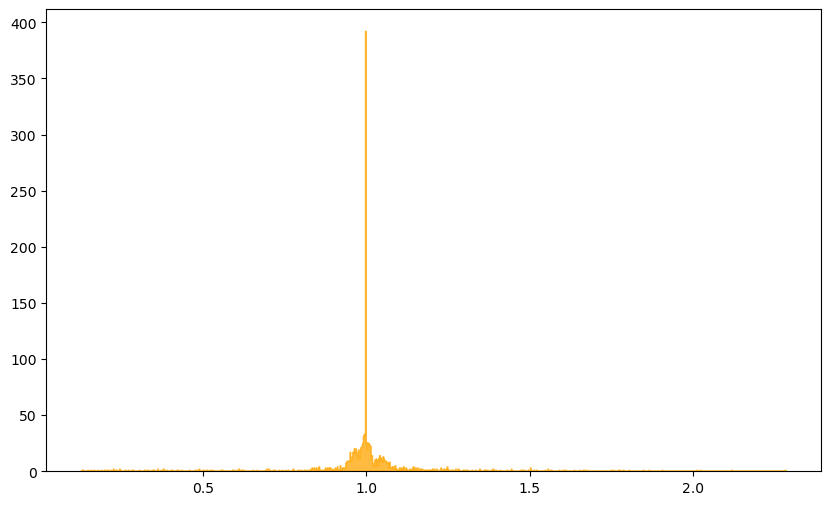

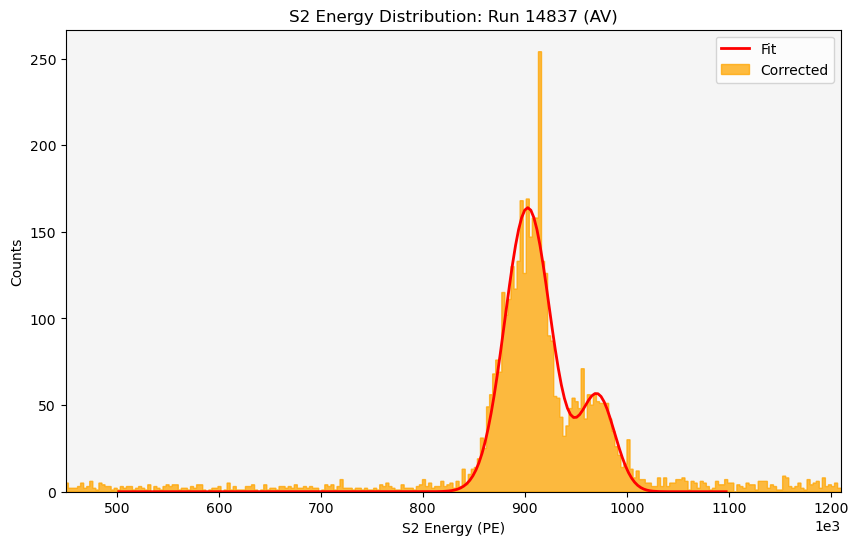

Run 14838 - Initial values: [200, 900000.0, 4008.215424789614, 50, 980000.0, 4008.215424789614]
Run 14838 - Final values: [3.12194780e+02 9.05534892e+05 2.02947849e+04 1.04711525e+02
 9.77439898e+05 1.78134449e+04]


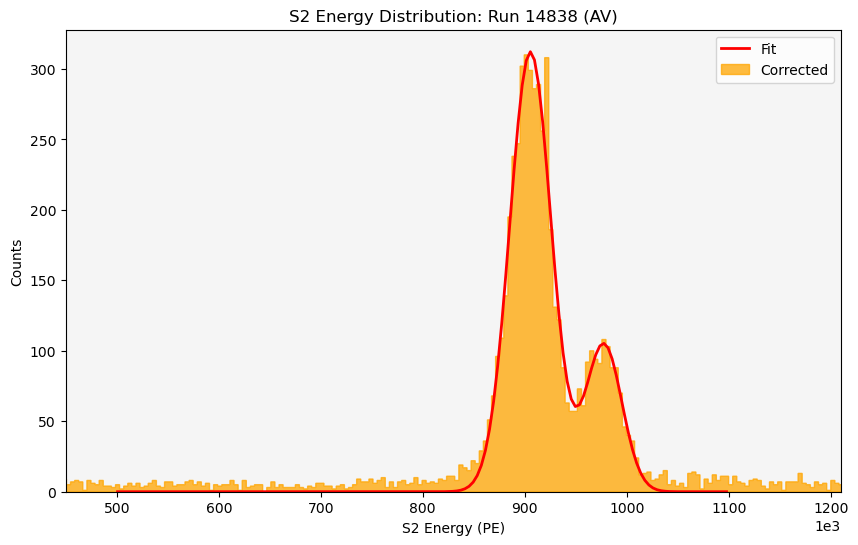

Run 14839 - Initial values: [200, 900000.0, 3778.865633797343, 50, 980000.0, 3778.865633797343]
Run 14839 - Final values: [1.71560169e+02 9.32826795e+05 1.80763580e+04 6.41851719e+01
 9.70598318e+05 5.41933995e+04]


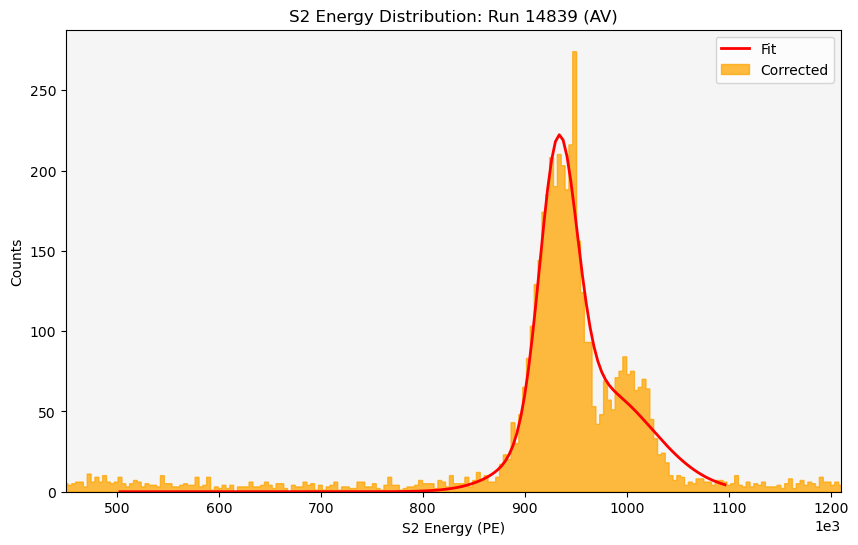

In [21]:
# Global
n_bins = 1000

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # S2 corrected
    E2_corr  = data[run_id]['S2e_corr']
    
    # Masking
    E2c_mask = E2_corr[AV_mask[run_id]]                                      
    
    # Store the corrected S2e data into a histogram
    plt.figure(figsize=(10, 6))
    E2c_counts, E2c_bins, _ = plt.hist(E2c_mask, bins=n_bins, histtype='stepfilled', 
                                       color='orange', alpha=0.75, ec='orange', label='Corrected')
    bin_width = np.diff(E2c_bins).mean()
    
    # Preliminar fitting: important define the limits of your fit!
    # if run_id == 14582:   # EL = 6 kV
    #     E2_min = 450e3;  E2_max = 650e3
    #     p0 = [200, 530e3, bin_width, 50, 580e3, bin_width]
    # elif run_id == 14601: # EL = 7 kV
    #     E2_min = 600e3;  E2_max = 850e3
    #     p0 = [200, 700e3, bin_width, 50, 775e3, bin_width]
    # elif run_id == 14608: # EL = 8 kV
    #     E2_min = 750e3;  E2_max = 1100e3
    #     p0 = [200, 900e3, bin_width, 50, 975e3, bin_width]
    # elif run_id == 14704: # EL = 9 kV
    #     E2_min = 975e3; E2_max = 1325e3
    #     p0 = [200, 1100e3, bin_width, 50, 1200e3, bin_width]
    # else:
    #     print(f'Is there the run {run_id} with us?')
    
    # NO scan!
    E2_min = 500e3;  E2_max = 1100e3
    p0 = [200, 830e3, bin_width, 50, 930e3, bin_width]
    if run_id in {14789}:
        p0 = [200, 790e3, bin_width, 50, 850e3, bin_width]
    elif run_id in {14803, 14804, 14815, 14816, 14817}:
        p0 = [200, 700e3, bin_width, 50, 800e3, bin_width]
    elif run_id in {14814, 14828}:
        print(f'Run {14828} is mufeo!')
        continue
    elif run_id in {14837, 14838, 14839}:
        p0 = [200, 900e3, bin_width, 50, 980e3, bin_width]
    elif run_id in {14840}:
        p0 = [200, 900e3, bin_width, 50, 1000e3, bin_width]
        
    E2c_centers, E2c_values = ff.prefit_1D(E2c_bins, E2c_mask, E2c_counts, x_min=E2_min, x_max=E2_max)
    
    # Bigaussian fit
    print(f'Run {run_id} - Initial values: {p0}')
    popt, pcov = curve_fit(ff.bigauss_func, E2c_centers, E2c_values, p0=p0)
    
    # Results
    print(f'Run {run_id} - Final values: {popt}') 
    perr = np.sqrt(np.diag(pcov))
    E2_parameters[run_id]["222Rn"] = {"CV_mu": popt[1], "Error_mu": perr[1], "CV_sigma": popt[2], "Error_sigma": perr[2]}
    fit_y = ff.bigauss_func(E2c_centers, *popt)
    
    # Plot
    #plt.scatter(E2c_centers, E2c_values, c='black', alpha=1.0, s=10, zorder=3)
    plt.plot(E2c_centers, fit_y, color="red", lw=2, label="Fit")
    plt.xlabel('S2 Energy (PE)')
    plt.xlim(0.9*E2_min, 1.1*E2_max)
    plt.ylabel('Counts')
    plt.ticklabel_format(axis='x', style='sci', scilimits=(3,3))
    plt.title(f'S2 Energy Distribution: Run {run_id} (AV)')
    plt.legend()

    plt.gca().set_facecolor('whitesmoke')
    #plt.savefig(f'images/stability/E2_fit_run{run_id}_{scan}.png', bbox_inches='tight')
    #plt.grid(True)
    plt.show()

## Short-term Stability

####  $S2e$ vs Date per run

In [48]:
# Store the light yield (short-term) information
LY_short_parameters = {run["run_number"]: {} for run in runs_info}

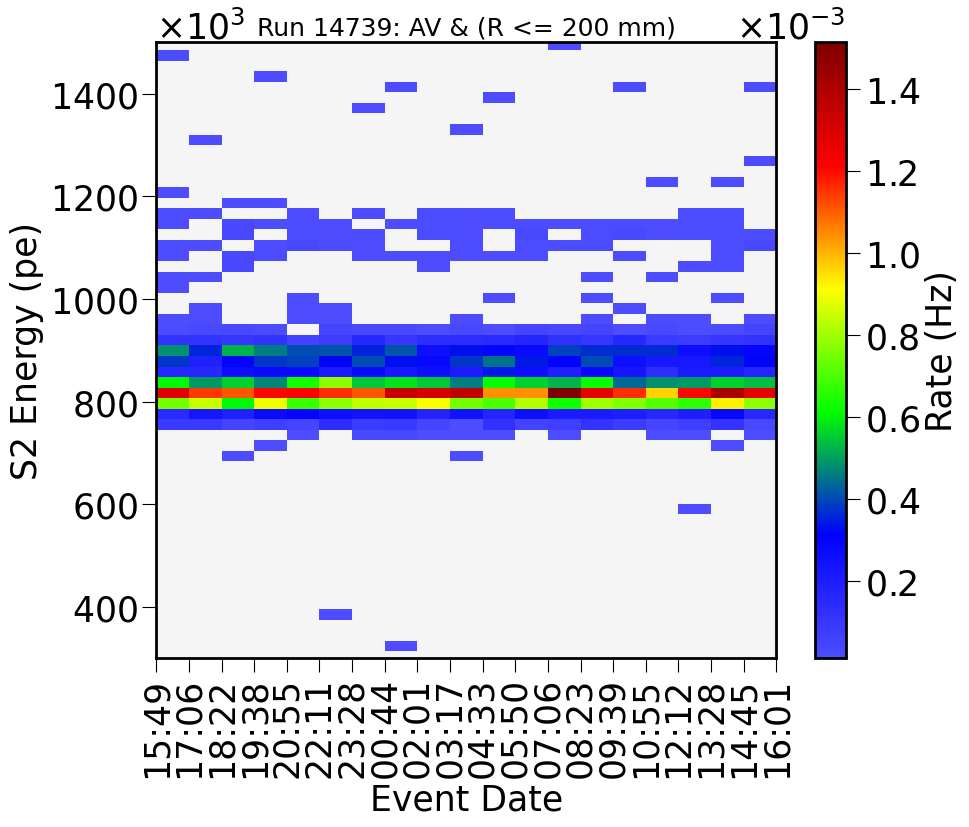

In [ ]:
# Global
rad_lim = 200
nx_bins = 20
ny_bins = 100

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Variables    
    E2c  = data[run_id]['S2e_corr']
    Date = data[run_id]['time']
    R    = data[run_id]['R']
    
    # Masking
    rad_mask  = (R <= rad_lim)
    E2c_mask  = E2c[AV_mask[run_id] & rad_mask]
    Date_mask = Date[AV_mask[run_id] & rad_mask]
    
    # 2D histogram
    S2e_Date_map, ex, ey = pt.hist_2D(Date_mask, E2c_mask, x_bins=nx_bins, y_bins=ny_bins)
    S2e_Date_map         = S2e_Date_map / run_long                                                   # Normalized by rate
    S2e_Date_map         = np.ma.masked_where(S2e_Date_map==0, S2e_Date_map)                         # Zero values masked
    
    # Convert x-axis bin edges to readable time format
    converted_ex = [crudo.epoch_converter(t, h=True) for t in ex]
    
    # # Store the S2e median per event date bin: important define the energy limits!
    # if run_id == 14582:
    #     E2_min = 450e3;  E2_max = 650e3
    # elif run_id == 14601:
    #     E2_min = 600e3;  E2_max = 850e3
    # elif run_id == 14714:
    #     E2_min = 700e3;  E2_max = 1000e3
    # elif run_id == 14608:
    #     E2_min = 750e3;  E2_max = 1100e3
    # elif run_id == 14704:
    #     E2_min = 975e3; E2_max = 1325e3
    # else:
    #     print('Is there this run number with us?')    

    # In case you are not in an EL scan!
    E2_min = 600e3;  E2_max = 1000e3

    # Filter the data for the fit
    fit_region_mask = (E2c_mask >= E2_min) & (E2c_mask <= E2_max)
    Date_fit = Date_mask[fit_region_mask]
    E2c_fit = E2c_mask[fit_region_mask]

    Date_centers, Date_err, E2c_means, E2c_means_err = ff.create_profile(Date_fit, E2c_fit, bins=nx_bins, statistic='mean')

    # Filtrar puntos donde el error es cero (bines con 1 solo evento)
    valid_points = S2e_means_err > 0
    # Date_centers   = Date_centers[valid_points]
    # Date_err       = Date_err[valid_points]
    # E2c_means     = E2c_means[valid_points]
    # E2c_means_err = E2c_means_err[valid_points]

    # Results                                                       
    LY_short_parameters[run_id] = {"CV_Date": Date_centers, "Error_Date": Date_err, "CV_E2c": E2c_means, "Error_E2c": E2c_means_err}                                                                                                                     
    
    # Plot
    plt.pcolormesh(ex, ey, S2e_Date_map.T, cmap=pt.custom_hsv, shading='auto')
    cbar = plt.colorbar(label='Rate (Hz)', shrink=1.0)
    # cbar.formatter.set_powerlimits((-3, -3))
    plt.xlabel('Event Date')
    plt.xticks(ex[::len(ex)//nx_bins], converted_ex[::len(ex)//nx_bins], rotation=90, ha='center')   # Set custom tick positions and labels
    plt.ylabel('S2 Energy (pe)')
    plt.ylim(0.5*E2_min, 1.5*E2_max)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(3, 3))  
    plt.title(f'Run {run_id}: AV & (R <= {rad_lim} mm)', fontsize=18)

    plt.gca().set_facecolor("whitesmoke")
    plt.show()  

In [58]:
LY_short_parameters[14739]

{'CV_Date': array([1.73764814e+09, 1.73765685e+09, 1.73766556e+09, 1.73767427e+09,
        1.73768298e+09, 1.73769170e+09, 1.73770041e+09, 1.73770912e+09,
        1.73771783e+09, 1.73772654e+09]),
 'Error_Date': array([4355.69949996, 4355.69950008, 4355.69949996, 4355.69949996,
        4355.69949996, 4355.69950008, 4355.69949996, 4355.69949996,
        4355.69950008, 4355.69949996]),
 'CV_E2c': array([832915.1681991 , 833903.35701136, 832785.49226724, 830581.31582191,
        830155.28941253, 833073.44387387, 831999.45413706, 833202.72082715,
        830224.0932197 , 829306.97619465]),
 'Error_E2c': array([1632.68084345, 1573.77920327, 1548.73205646, 1505.17223272,
        1557.01750917, 1529.97483472, 1529.7160959 , 1651.44425204,
        1676.41081869, 1510.69370698])}

LY local variation = 0.9643%


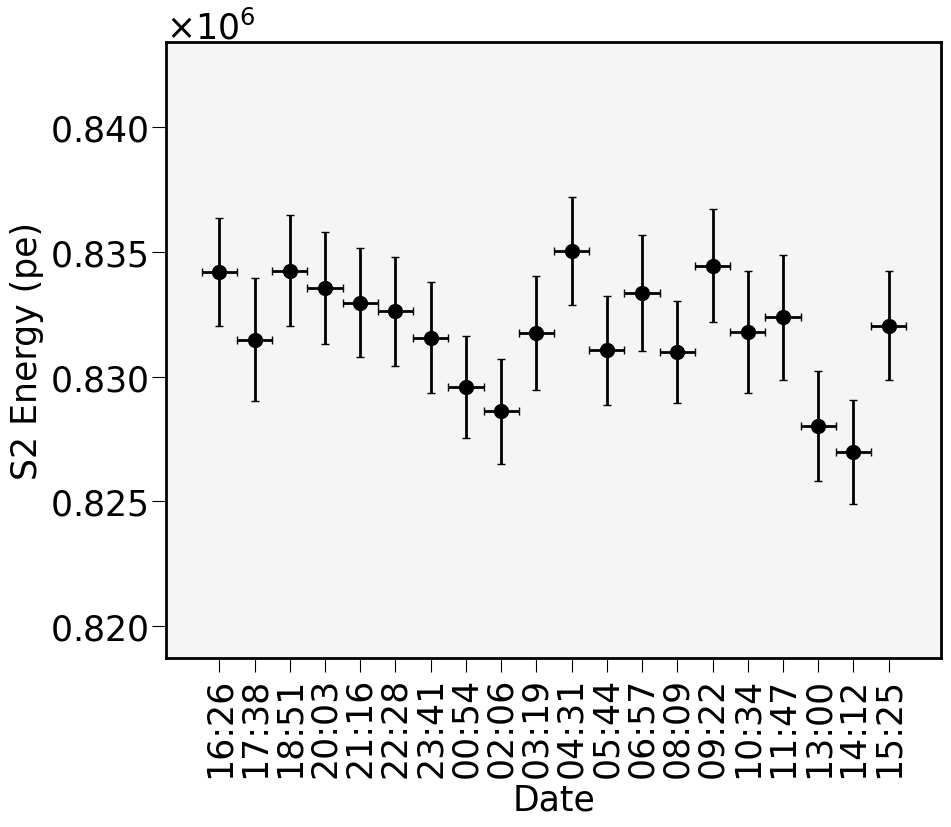

In [81]:
# Global

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    
    # Retrieve light yield (short-term) info  
    CV_Date  = LY_short_parameters[run_id]['CV_Date']
    Err_Date = LY_short_parameters[run_id]['Error_Date']
    CV_E2c   = LY_short_parameters[run_id]['CV_E2c']
    Err_E2c  = LY_short_parameters[run_id]['Error_E2c']
    
    # Light yield local variation
    LY_variation = 100 * (1 - (CV_E2c.min() / CV_E2c.max()))
    print(f'LY local variation = {LY_variation:.4f}%')
    
    # Convert x-axis bin edges to readable time format.
    x_labels = [crudo.epoch_converter(t, h=True) for t in CV_Date]
       
    # Plot: run voltage or run date?
    # plt.figure(figsize=(10, 6))
    plt.errorbar(CV_Date, CV_E2c, xerr=Err_Date, yerr=Err_E2c,
                 fmt='o', ms=10, c='black', capsize=3, elinewidth=2, ecolor='black')
    
    # Styling
    plt.xlabel('Date')
    plt.xticks(CV_Date, x_labels, rotation=90, ha='center')
    plt.ylabel('S2 Energy (pe)')
    plt.ylim(0.99*CV_E2c.min(), 1.01*CV_E2c.max())
    plt.ticklabel_format(axis='y', style='sci', scilimits=(6, 6))
    # plt.title(f'Light Yield for Run {run_id}: AV & (R <= {rad_lim} mm)', fontsize=15)
    
    # If you wannt to add some lines or text...
    # plt.axvline(x=1731660000, c='red', ls='--', lw=1)
    # plt.text(1731660000, 520e3, 'recirculation stop', c='red', va='center',  ha='right',  rotation=90)
    # plt.axvline(x=1732885440, c='red', ls='--', lw=1)
    # plt.text(1732885440, 520e3, 'recirculation start', c='red', va='center',  ha='right',  rotation=90)
    
    plt.gca().set_facecolor("whitesmoke")
    plt.savefig(f'/lustre/ific.uv.es/prj/gl/neutrinos/users/ccortesp/NEXT-100/temp/LY_short_evolution_run{run_id}.pdf', bbox_inches='tight')
    plt.show()

## Long-term Stability

### E1 Variation

LY global variation = 21.1551%


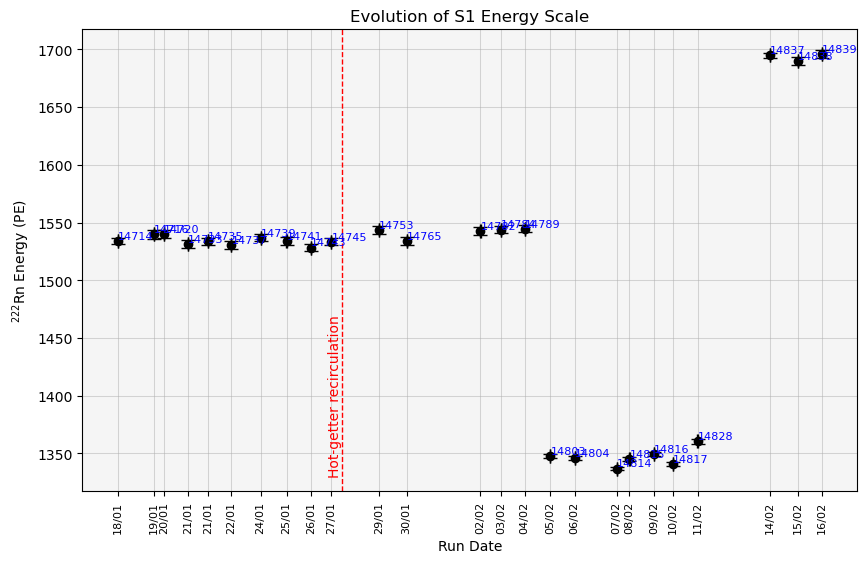

In [60]:
# Global
runs_LY  = []
voltages = []
x_date   = []

plt.figure(figsize=(10, 6))

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    # voltages.append(run_volt)
    
    # Variables    
    Date = data[run_id]['time']
    
    # if run_id in {14814, 14828}:
    #     print(f'Run {14828} is mufeo!')
    #     continue
    
    # Retrieve lifetime fit value   
    mu_CV    = E1_parameters[run_id]['222Rn']['CV_mu']   
    mu_error = E1_parameters[run_id]['222Rn']['Error_mu']
    runs_LY.append(mu_CV) 
    
    # Mean date + error for each run
    Date_CV    = Date.mean()
    Date_error = Date.std() / np.sqrt(len(Date))
    x_date.append(Date_CV)
    
    # Plot: run voltage or run date?
    # plt.errorbar(run_volt, mu_CV, yerr=mu_error,
    #              fmt='o', c='black', ecolor='black', capsize=5)
    plt.errorbar(Date_CV, mu_CV, xerr=Date_error, yerr=mu_error,
                 fmt='o', c='black', ecolor='black', capsize=5)
    plt.text(Date_CV, mu_CV, str(run_id), fontsize=8, ha='left', va='bottom', color='blue')   # Run number near the point

# Light yield global variation
runs_LY = np.array(runs_LY)
LY_variation = 100 * (1 - (runs_LY.min() / runs_LY.max()))
print(f'LY global variation = {LY_variation:.4f}%')

# Convert x-axis bin edges to readable time format.
x_labels = [crudo.epoch_converter(t, h=False) for t in x_date]

# Styling
# plt.xlabel(f'{scan} Voltage (kV)')
plt.xlabel('Run Date')
plt.xticks(x_date, x_labels, rotation=90, ha='center', fontsize=8)
plt.ylabel('$^{222}$Rn Energy (PE)')
# plt.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
plt.title(f'Evolution of S1 Energy Scale')
plt.axvline(x=1737975600, c='red', ls='--', lw=1)
plt.text(1737975600, 1400, 'Hot-getter recirculation', c='red', va='center',  ha='right',  rotation=90)

plt.gca().set_facecolor("whitesmoke")
plt.grid(True, ls='-', lw=0.75, alpha=0.5)
# plt.savefig(f'images/stability/LY_long_evolution.png', bbox_inches='tight')
plt.show()

### $^{222}\text{Rn}$ vs Date

Run 14828 is mufeo!
Run 14828 is mufeo!
LY global variation = 29.7329%


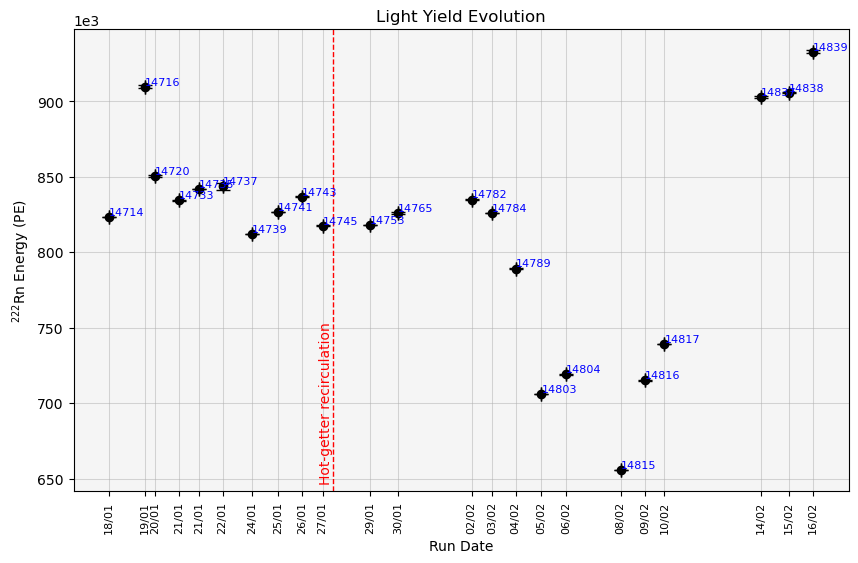

In [24]:
# Global
runs_LY  = []
voltages = []
x_date   = []

plt.figure(figsize=(10, 6))

for i, entry in enumerate(runs_info):
    
    # Run info
    run_id   = entry["run_number"]
    # run_volt = entry[scan_key] / 1e3
    run_long = entry["duration"]
    # voltages.append(run_volt)
    
    # Variables    
    Date = data[run_id]['time']
    
    if run_id in {14814, 14828}:
        print(f'Run {14828} is mufeo!')
        continue
    
    # Retrieve lifetime fit value   
    mu_CV    = E2_parameters[run_id]['222Rn']['CV_mu']   
    mu_error = E2_parameters[run_id]['222Rn']['Error_mu']
    runs_LY.append(mu_CV) 
    
    # Mean date + error for each run
    Date_CV    = Date.mean()
    Date_error = Date.std() / np.sqrt(len(Date))
    x_date.append(Date_CV)
    
    # Plot: run voltage or run date?
    # plt.errorbar(run_volt, mu_CV, yerr=mu_error,
    #              fmt='o', c='black', ecolor='black', capsize=5)
    plt.errorbar(Date_CV, mu_CV, xerr=Date_error, yerr=mu_error,
                 fmt='o', c='black', ecolor='black', capsize=5)
    plt.text(Date_CV, mu_CV, str(run_id), fontsize=8, ha='left', va='bottom', color='blue')   # Run number near the point

# Light yield global variation
runs_LY = np.array(runs_LY)
LY_variation = 100 * (1 - (runs_LY.min() / runs_LY.max()))
print(f'LY global variation = {LY_variation:.4f}%')

# Convert x-axis bin edges to readable time format.
x_labels = [crudo.epoch_converter(t, h=False) for t in x_date]

# Styling
# plt.xlabel(f'{scan} Voltage (kV)')
plt.xlabel('Run Date')
plt.xticks(x_date, x_labels, rotation=90, ha='center', fontsize=8)
plt.ylabel('$^{222}$Rn Energy (PE)')
plt.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
plt.title(f'Light Yield Evolution')
plt.axvline(x=1737975600, c='red', ls='--', lw=1)
plt.text(1737975600, 700e3, 'Hot-getter recirculation', c='red', va='center',  ha='right',  rotation=90)

plt.gca().set_facecolor("whitesmoke")
plt.grid(True, ls='-', lw=0.75, alpha=0.5)
plt.savefig(f'images/stability/LY_long_evolution.png', bbox_inches='tight')
plt.show()